<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Movie_reviews_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
keras.__version__

'2.2.4-tf'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        uniques, counts = np.unique(sequence, return_counts=True)
        #results[i, uniques] = counts/np.linalg.norm(counts)  
        results[i, uniques] = counts/np.sum(counts)  
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [5]:
x_train[0]

array([0.        , 0.00458716, 0.02752294, ..., 0.        , 0.        ,
       0.        ])

In [6]:
np.linalg.norm(x_train[2])

0.12746241670646402

We should also vectorize our labels, which is straightforward:

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

In [8]:
!rm -f vaes_net.py
!wget "https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py"

--2020-03-09 06:27:42--  https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10491 (10K) [text/plain]
Saving to: ‘vaes_net.py’

vaes_net.py         100%[===================>]  10.25K  --.-KB/s    in 0s      

2020-03-09 06:27:42 (183 MB/s) - ‘vaes_net.py’ saved [10491/10491]



In [9]:
import pandas as pd

data = pd.DataFrame(np.concatenate([x_train,x_test],axis=0))

labels = [reverse_word_index.get(i - 3, '?') for i in range(0,10000)]
labels[0]="padding"
labels[1]="start of sequence"
labels[2]="unknown"

data.columns = labels

data

padding  start of sequence   unknown  ...  grail  retrospect  edged
0          0.0           0.004587  0.027523  ...    0.0         0.0    0.0
1          0.0           0.005291  0.037037  ...    0.0         0.0    0.0
2          0.0           0.007092  0.014184  ...    0.0         0.0    0.0
3          0.0           0.001818  0.092727  ...    0.0         0.0    0.0
4          0.0           0.006803  0.006803  ...    0.0         0.0    0.0
...        ...                ...       ...  ...    ...         ...    ...
49995      0.0           0.001805  0.048736  ...    0.0         0.0    0.0
49996      0.0           0.013889  0.055556  ...    0.0         0.0    0.0
49997      0.0           0.013333  0.026667  ...    0.0         0.0    0.0
49998      0.0           0.010101  0.010101  ...    0.0         0.0    0.0
49999      0.0           0.005814  0.058140  ...    0.0         0.0    0.0

[50000 rows x 10000 columns]

In [0]:
from sklearn.preprocessing import QuantileTransformer

qt_trans = QuantileTransformer(n_quantiles=1000, random_state=2)
qt_trans.fit(data[:1000])
qt = pd.DataFrame(qt_trans.transform(data))
qt.columns = labels

x_train = qt[:25000]
x_test = qt[25000:]

In [11]:
x_train

padding  start of sequence   unknown  ...  grail  retrospect  edged
0          0.0           0.380881  0.244244  ...    0.0         0.0    0.0
1          0.0           0.473974  0.365866  ...    0.0         0.0    0.0
2          0.0           0.676176  0.091592  ...    0.0         0.0    0.0
3          0.0           0.080080  0.879880  ...    0.0         0.0    0.0
4          0.0           0.647147  0.049049  ...    0.0         0.0    0.0
...        ...                ...       ...  ...    ...         ...    ...
24995      0.0           0.501502  0.317317  ...    0.0         0.0    0.0
24996      0.0           0.209710  0.322777  ...    0.0         0.0    0.0
24997      0.0           0.488989  0.774093  ...    0.0         0.0    0.0
24998      0.0           0.626627  0.317317  ...    0.0         0.0    0.0
24999      0.0           0.612613  0.797798  ...    0.0         0.0    0.0

[25000 rows x 10000 columns]

In [0]:
train_examples = x_train.shape[0]
flag_0 = np.zeros((train_examples,1),dtype=x_train.values.dtype)
x_train = np.concatenate((x_train.values,flag_0),axis=-1)
test_examples = x_test.shape[0]
flag_1 = np.ones((test_examples,1),dtype=x_test.values.dtype)
x_test = np.concatenate((x_test.values,flag_1),axis=-1)

In [0]:
import vaes_net as vnn
import importlib

In [14]:
from tensorflow import set_random_seed
from numpy.random import seed

importlib.reload(vnn)
seed(42)
set_random_seed(42)

vae = vnn.make_vae(full_data=qt,  
    img_shape = (10000+1, ),
    latent_dim = 1, 
    dense_width = 2048,
    l2_penalty=0.000000000001,
    l1_penalty=0.0,
    encoder_dropout_rate=0.5,
    decoder_dropout_rate=0.001,
    entanglement_penalty = 2,
    hidden_n = 2,
    optimizer = keras.optimizers.Adam(lr=0.00001),
    plot_every_n = 10,
    plot_types_args = {'n_type': 60, 'each_hight' : 20, 
                                  'approx_width': 400, 
                                  'frac_width': 0.55, 
                                  'n_activity':  200,  
                                  'lowest_percentile': 1, 
                                  'highest_percentile' : 99, 
                                  'figsize': (10, 81),
                                  'cmap': 'viridis', 
                                  'n_xlabels':13, 
                                  'spacing': -0.001, 
                                  'hist_size': 0.05, 
                                  'scaler': True})  


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(?, 1)


In [0]:
epochs = 200
batch_size = 4096

Train on 25000 samples, validate on 25000 samples
Epoch 1/200
24576/25000 [============================>.] - ETA: 0s - loss: 0.0114

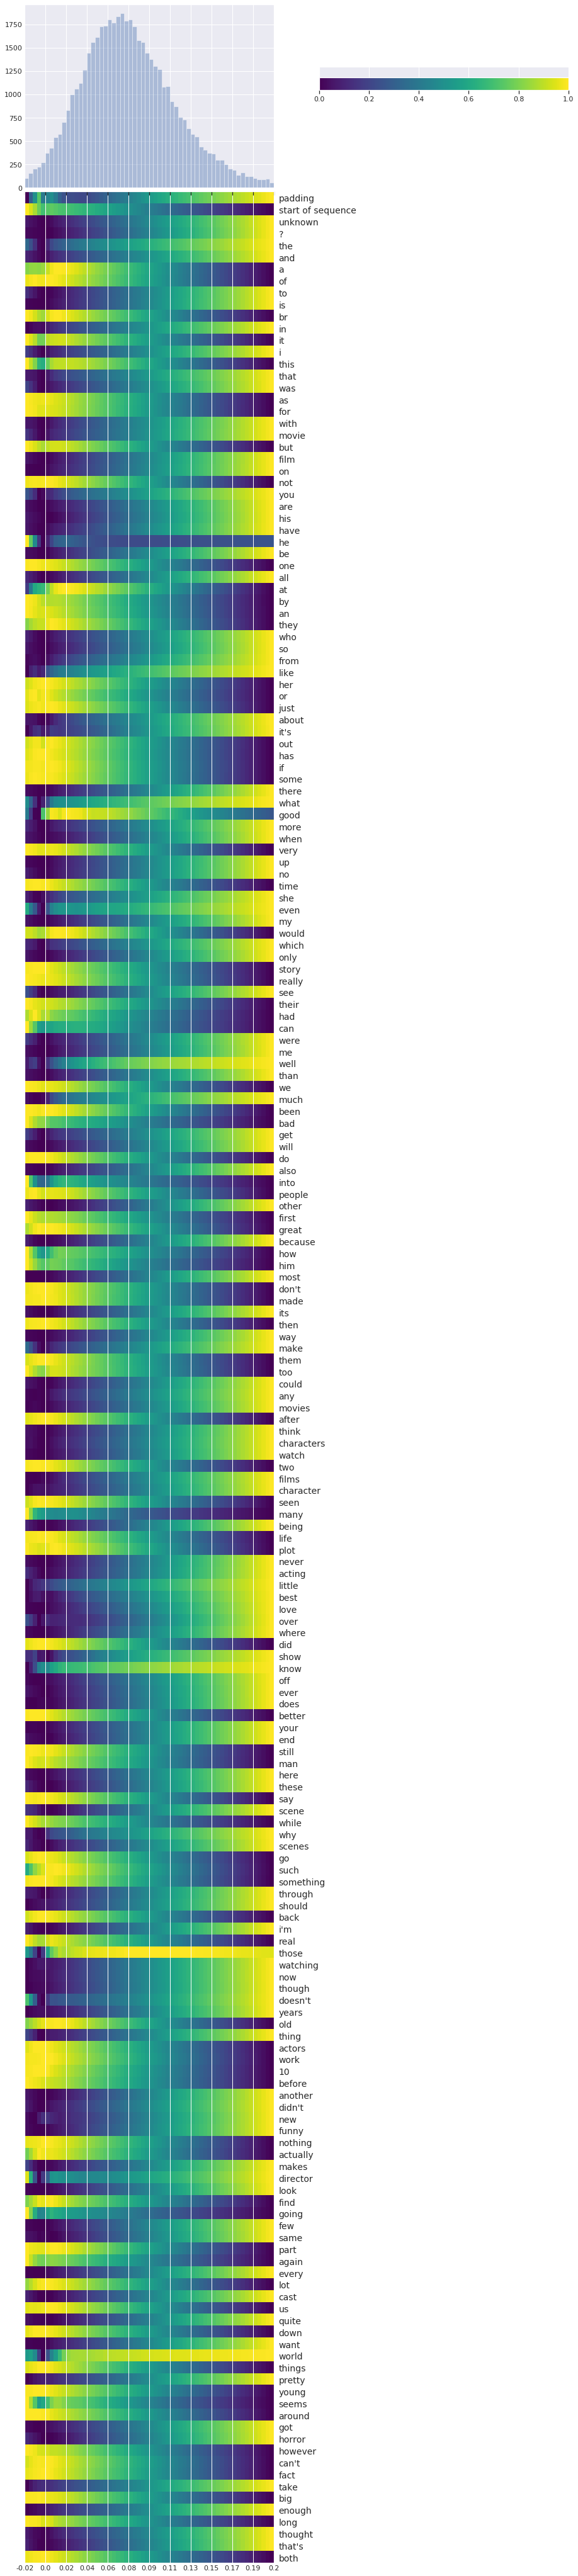

25000/25000 [==============================] - 16s 634us/sample - loss: 0.0114 - val_loss: 0.0106
Epoch 2/200
25000/25000 [==============================] - 4s 158us/sample - loss: 0.0113 - val_loss: 0.0106
Epoch 3/200
25000/25000 [==============================] - 4s 156us/sample - loss: 0.0113 - val_loss: 0.0106
Epoch 4/200
25000/25000 [==============================] - 4s 156us/sample - loss: 0.0112 - val_loss: 0.0106
Epoch 5/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0112 - val_loss: 0.0106
Epoch 6/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0112 - val_loss: 0.0106
Epoch 7/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0112 - val_loss: 0.0106
Epoch 8/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0112 - val_loss: 0.0106
Epoch 9/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0112 - val_loss: 0.0106
Epoch 10/200
25000/25000 [====

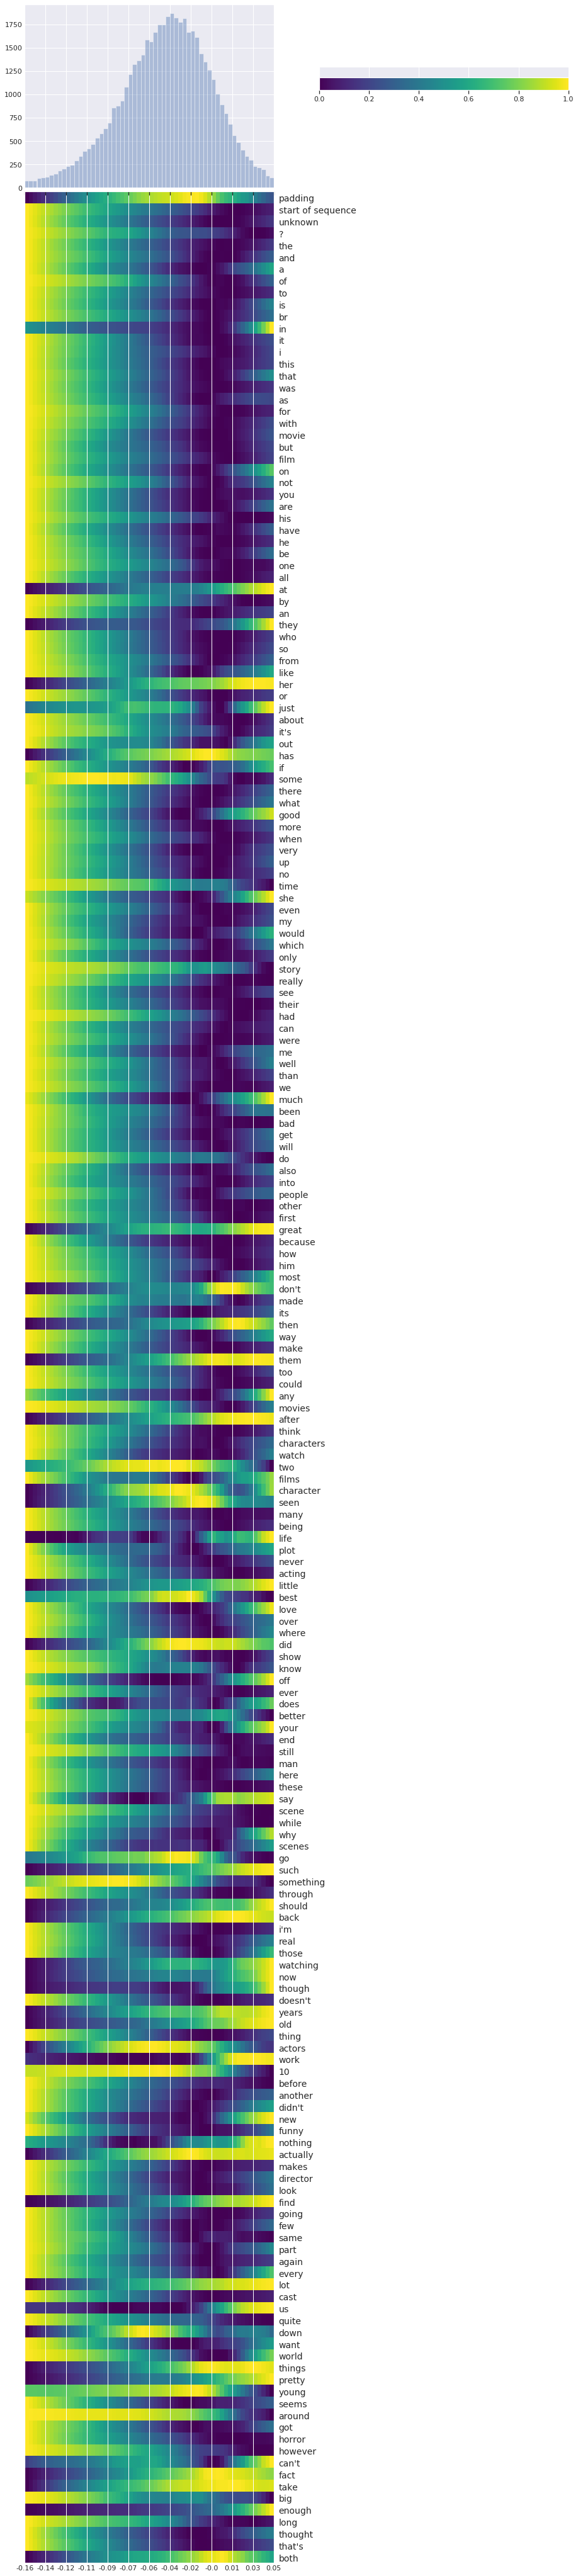

25000/25000 [==============================] - 12s 480us/sample - loss: 0.0112 - val_loss: 0.0106
Epoch 12/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0112 - val_loss: 0.0106
Epoch 13/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0111 - val_loss: 0.0106
Epoch 14/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0111 - val_loss: 0.0106
Epoch 15/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0111 - val_loss: 0.0106
Epoch 16/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0111 - val_loss: 0.0105
Epoch 17/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0111 - val_loss: 0.0105
Epoch 18/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0111 - val_loss: 0.0105
Epoch 19/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0111 - val_loss: 0.0105
Epoch 20/200
25000/250

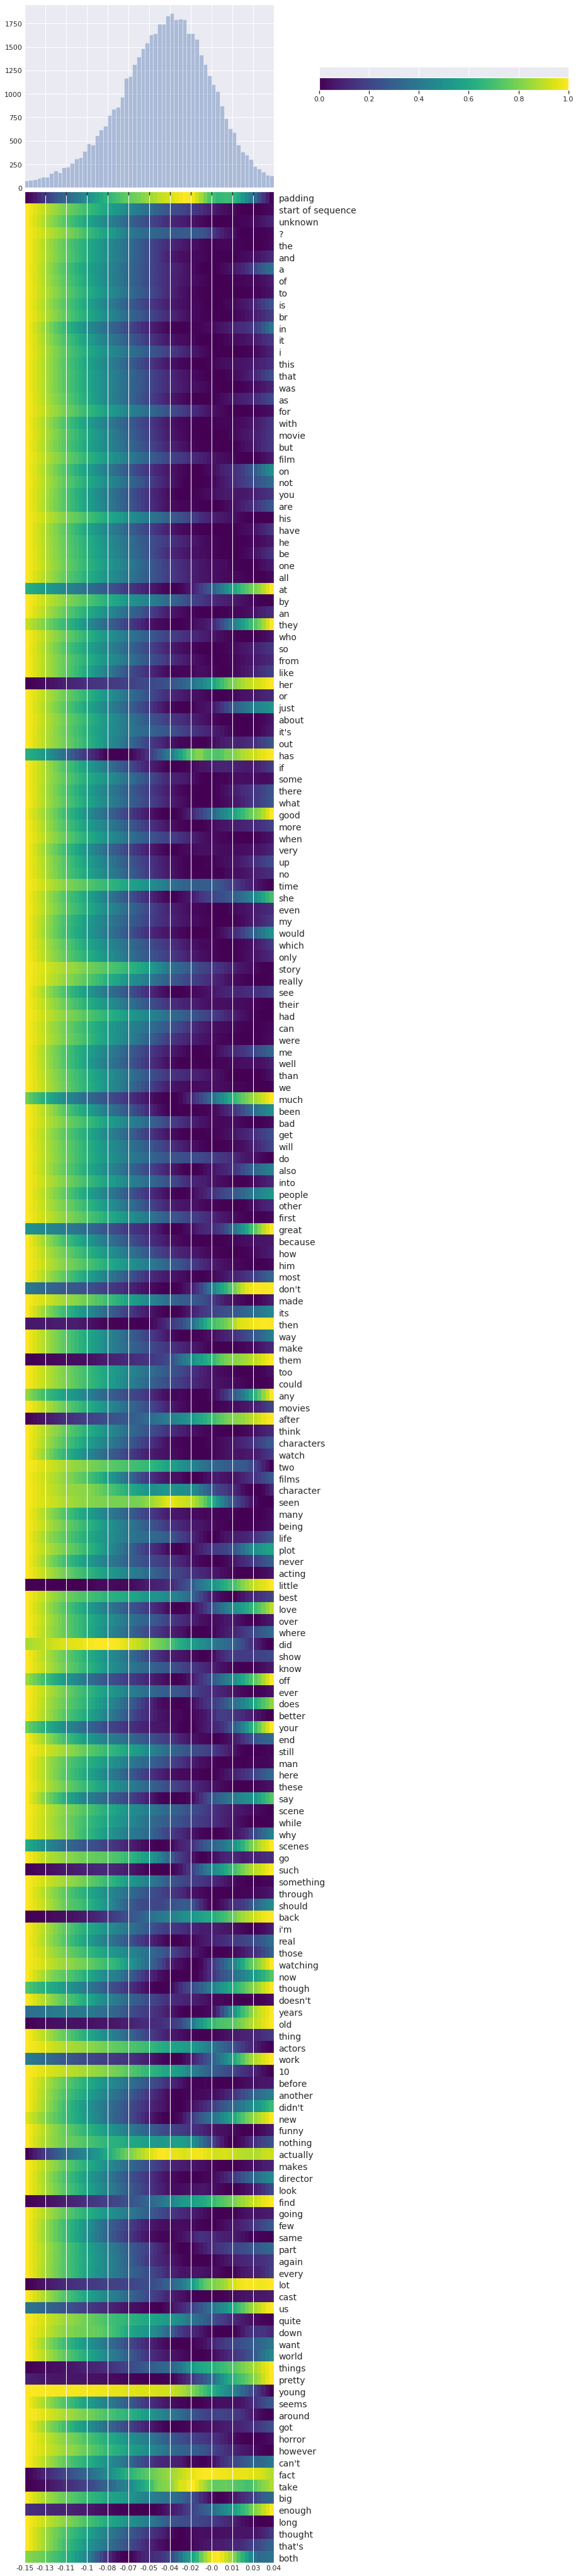

25000/25000 [==============================] - 12s 482us/sample - loss: 0.0111 - val_loss: 0.0105
Epoch 22/200
25000/25000 [==============================] - 4s 156us/sample - loss: 0.0111 - val_loss: 0.0105
Epoch 23/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0111 - val_loss: 0.0105
Epoch 24/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0110 - val_loss: 0.0105
Epoch 25/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0110 - val_loss: 0.0105
Epoch 26/200
25000/25000 [==============================] - 4s 152us/sample - loss: 0.0110 - val_loss: 0.0105
Epoch 27/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0110 - val_loss: 0.0105
Epoch 28/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0110 - val_loss: 0.0105
Epoch 29/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0110 - val_loss: 0.0104
Epoch 30/200
25000/250

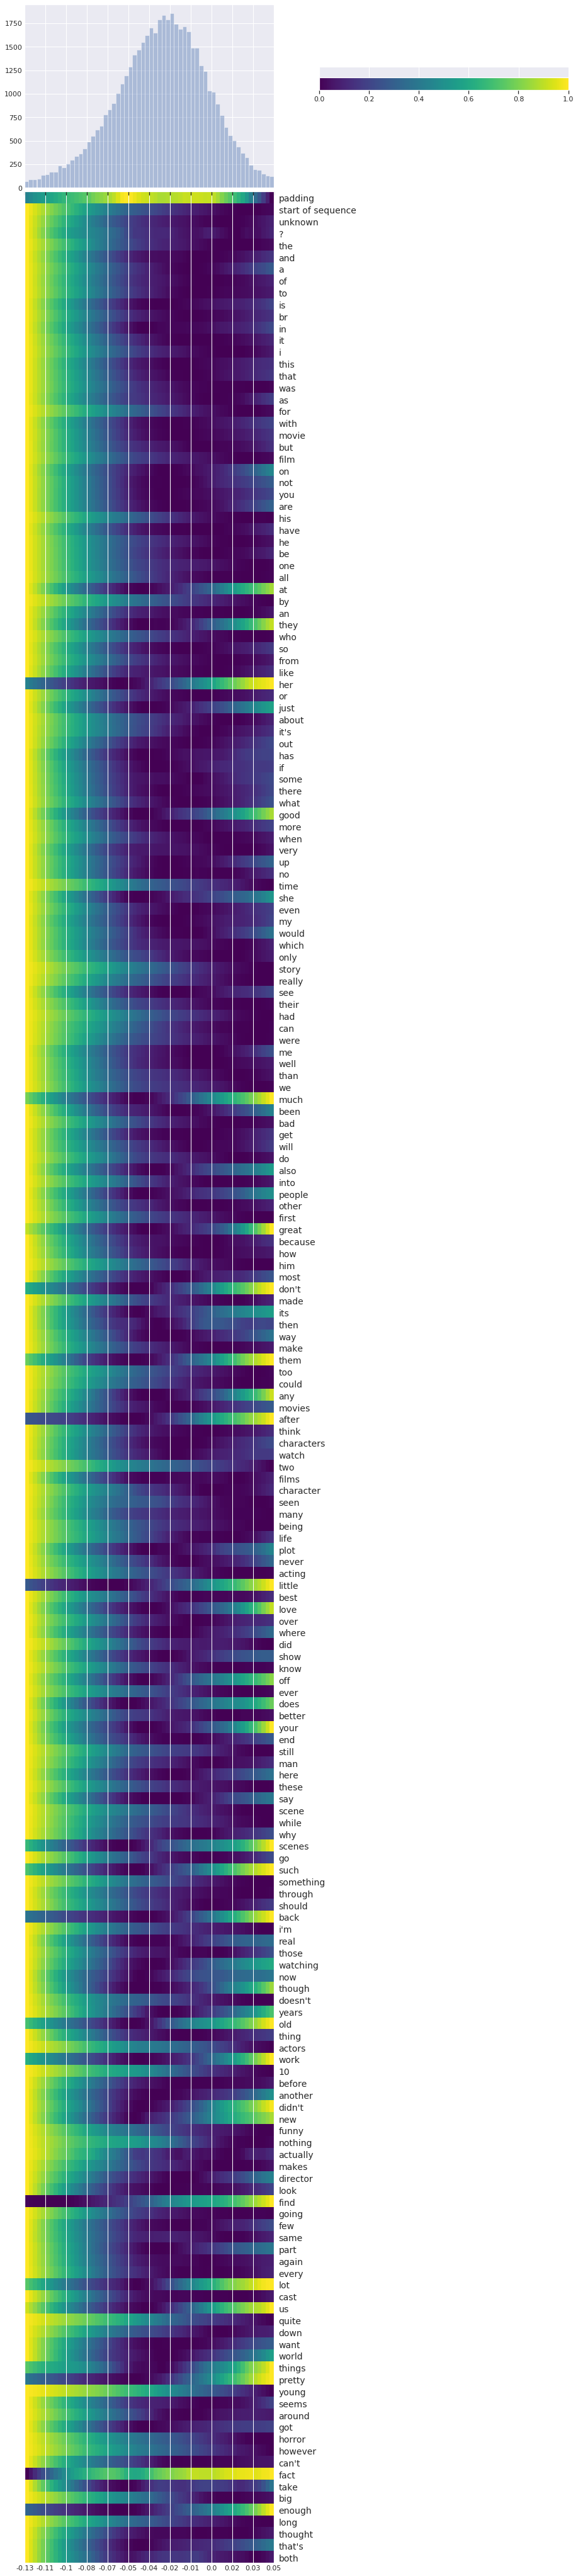

25000/25000 [==============================] - 12s 481us/sample - loss: 0.0109 - val_loss: 0.0104
Epoch 32/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0109 - val_loss: 0.0104
Epoch 33/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0109 - val_loss: 0.0104
Epoch 34/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0108 - val_loss: 0.0104
Epoch 35/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0108 - val_loss: 0.0103
Epoch 36/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0108 - val_loss: 0.0103
Epoch 37/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0107 - val_loss: 0.0103
Epoch 38/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0107 - val_loss: 0.0103
Epoch 39/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0106 - val_loss: 0.0102
Epoch 40/200
25000/250

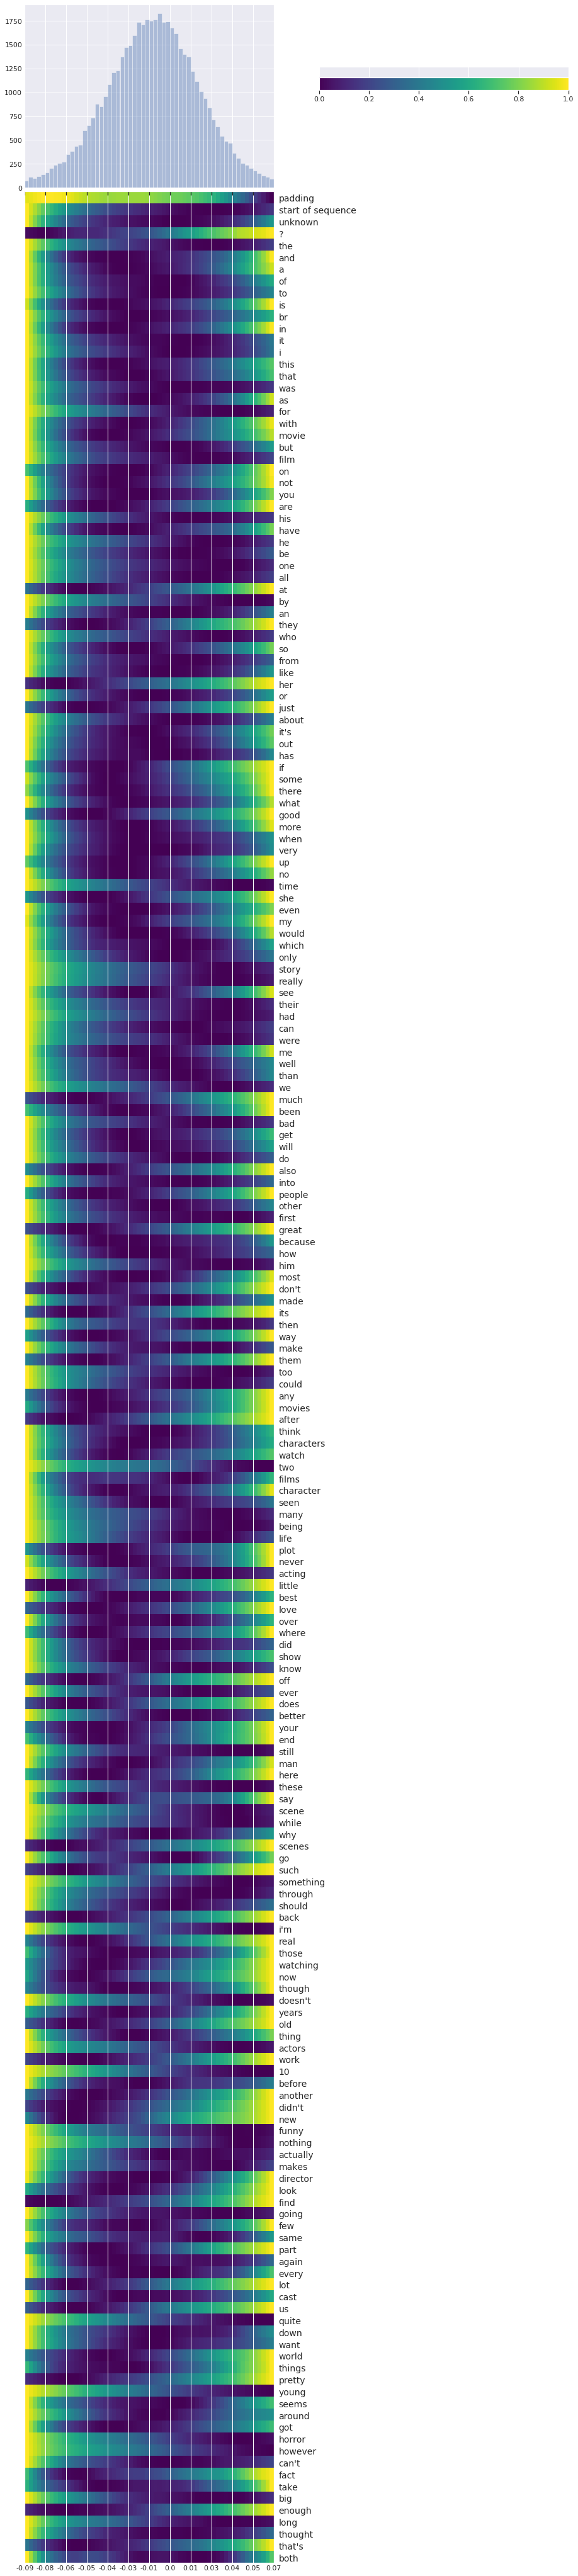

25000/25000 [==============================] - 12s 492us/sample - loss: 0.0105 - val_loss: 0.0102
Epoch 42/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0105 - val_loss: 0.0101
Epoch 43/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0104 - val_loss: 0.0101
Epoch 44/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0104 - val_loss: 0.0101
Epoch 45/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0103 - val_loss: 0.0100
Epoch 46/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0103 - val_loss: 0.0100
Epoch 47/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0102 - val_loss: 0.0099
Epoch 48/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0102 - val_loss: 0.0099
Epoch 49/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0101 - val_loss: 0.0099
Epoch 50/200
25000/250

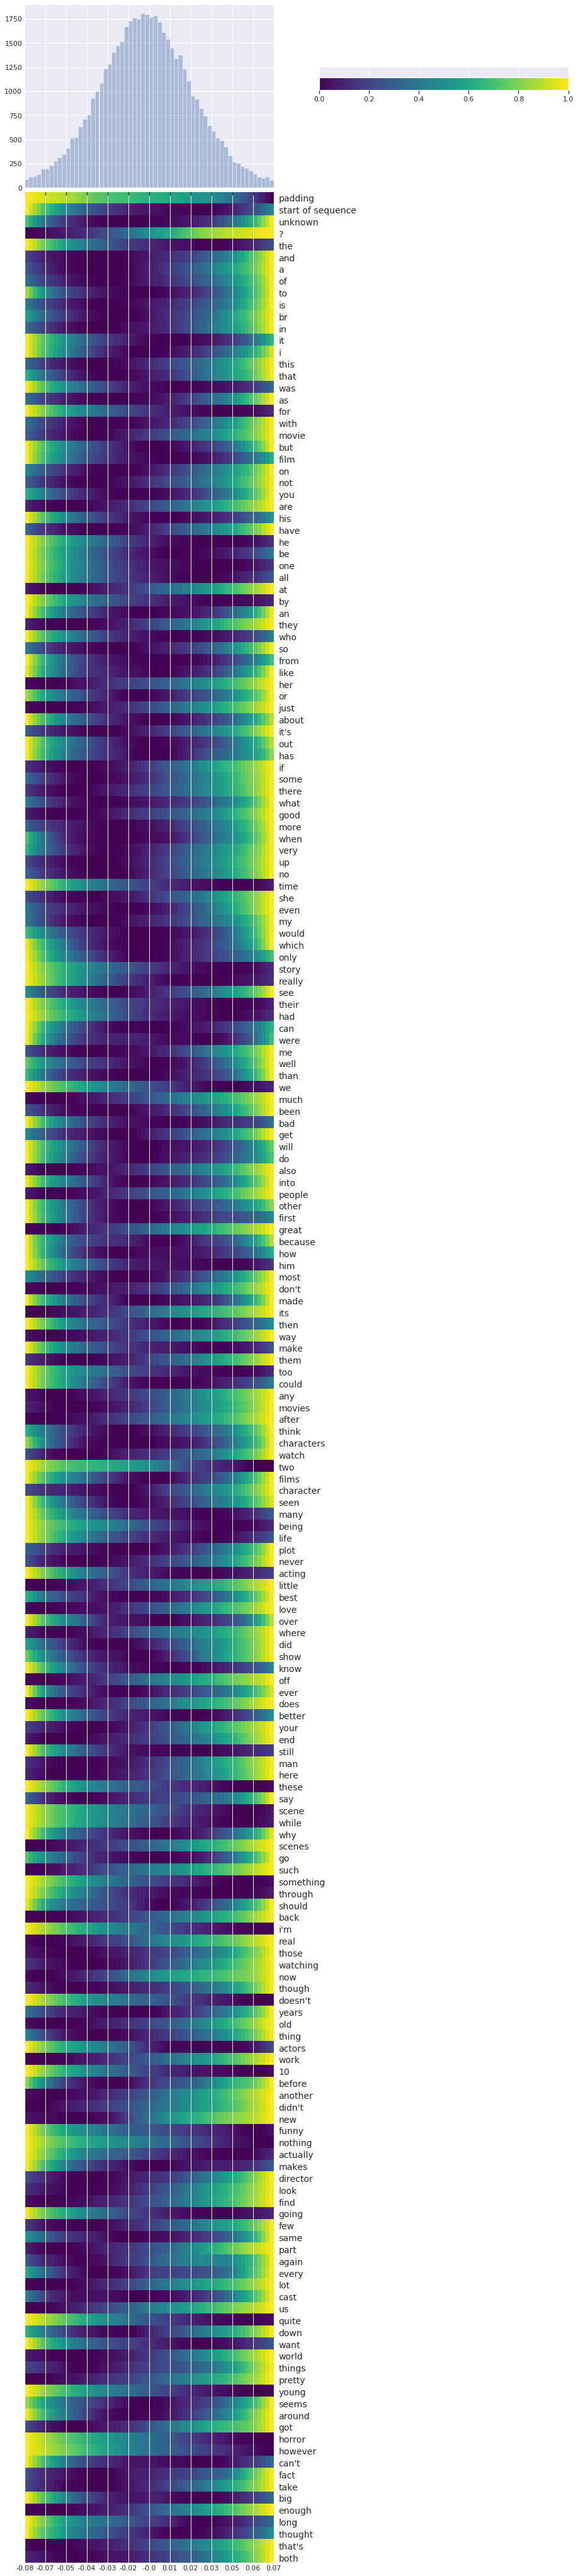

25000/25000 [==============================] - 12s 491us/sample - loss: 0.0101 - val_loss: 0.0098
Epoch 52/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0100 - val_loss: 0.0097
Epoch 53/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0100 - val_loss: 0.0097
Epoch 54/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0100 - val_loss: 0.0097
Epoch 55/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0100 - val_loss: 0.0096
Epoch 56/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0100 - val_loss: 0.0096
Epoch 57/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0099 - val_loss: 0.0096
Epoch 58/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0099 - val_loss: 0.0095
Epoch 59/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0099 - val_loss: 0.0095
Epoch 60/200
25000/250

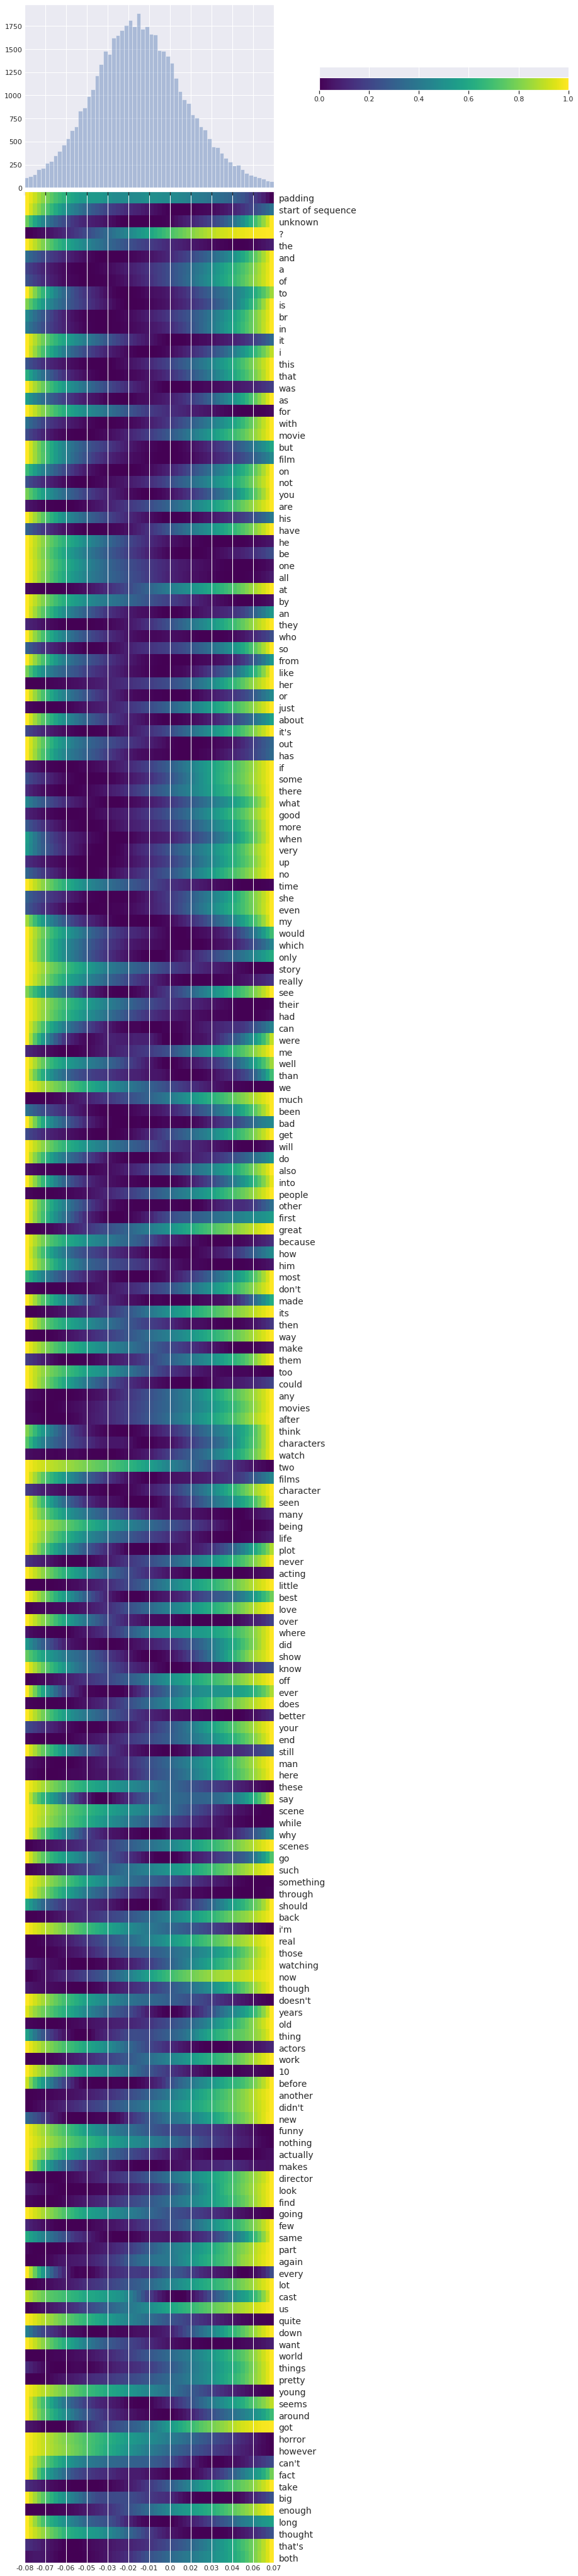

25000/25000 [==============================] - 12s 481us/sample - loss: 0.0099 - val_loss: 0.0095
Epoch 62/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0099 - val_loss: 0.0094
Epoch 63/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0098 - val_loss: 0.0094
Epoch 64/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0098 - val_loss: 0.0094
Epoch 65/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0098 - val_loss: 0.0094
Epoch 66/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0098 - val_loss: 0.0093
Epoch 67/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0098 - val_loss: 0.0093
Epoch 68/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0098 - val_loss: 0.0093
Epoch 69/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0098 - val_loss: 0.0093
Epoch 70/200
25000/250

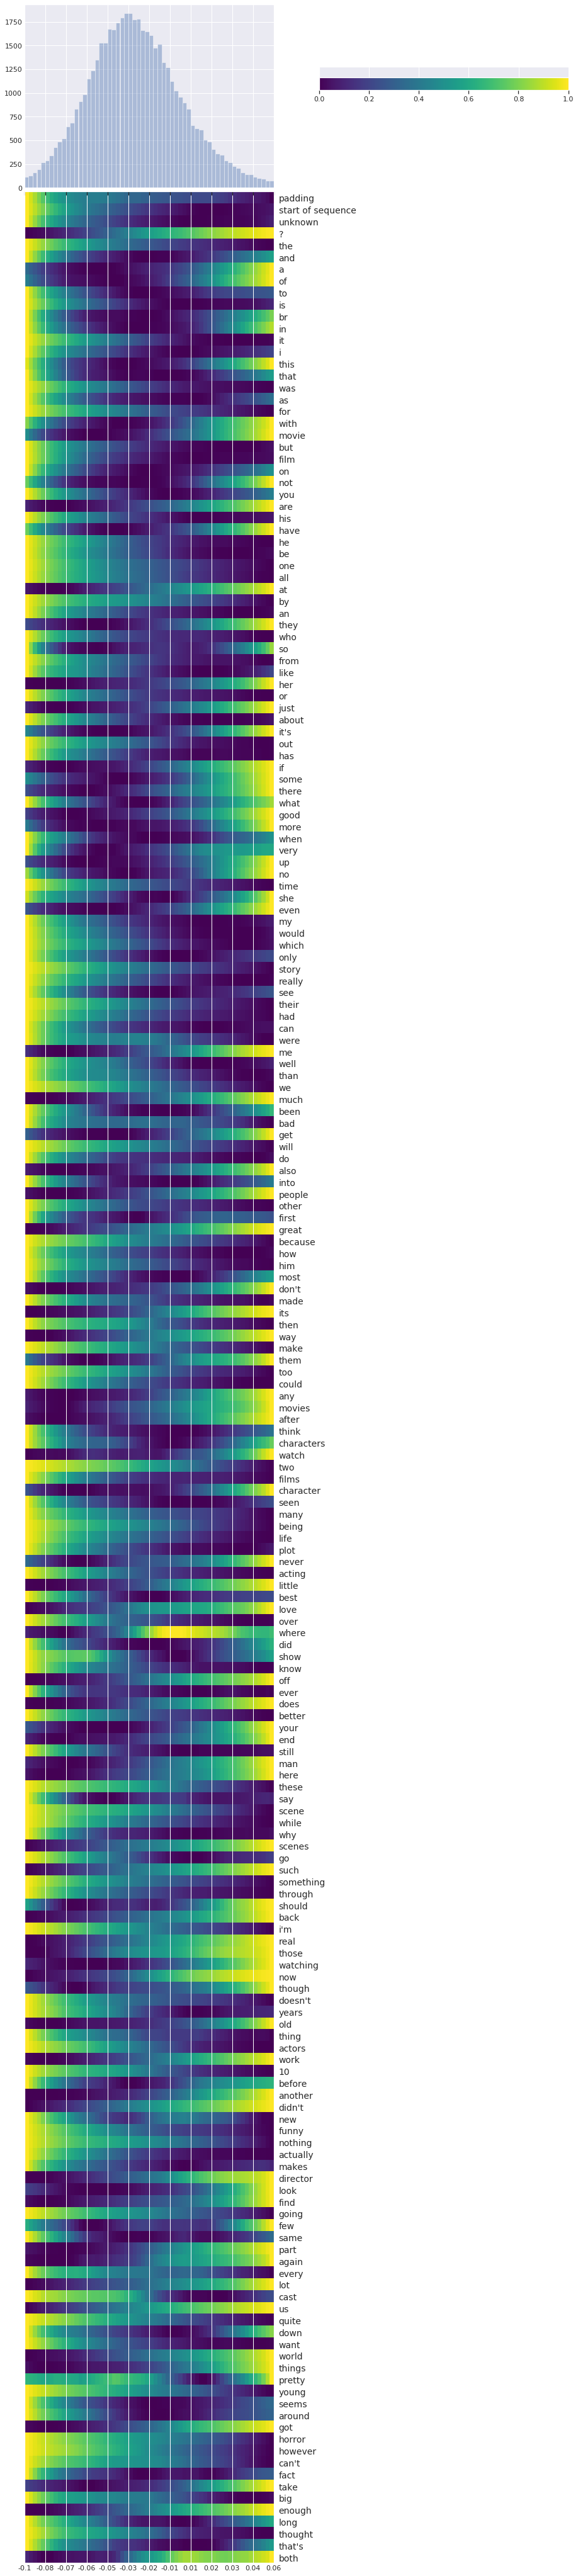

25000/25000 [==============================] - 12s 483us/sample - loss: 0.0098 - val_loss: 0.0093
Epoch 72/200
25000/25000 [==============================] - 4s 155us/sample - loss: 0.0098 - val_loss: 0.0093
Epoch 73/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0098 - val_loss: 0.0092
Epoch 74/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0098 - val_loss: 0.0092
Epoch 75/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0098 - val_loss: 0.0092
Epoch 76/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 77/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 78/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 79/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 80/200
25000/250

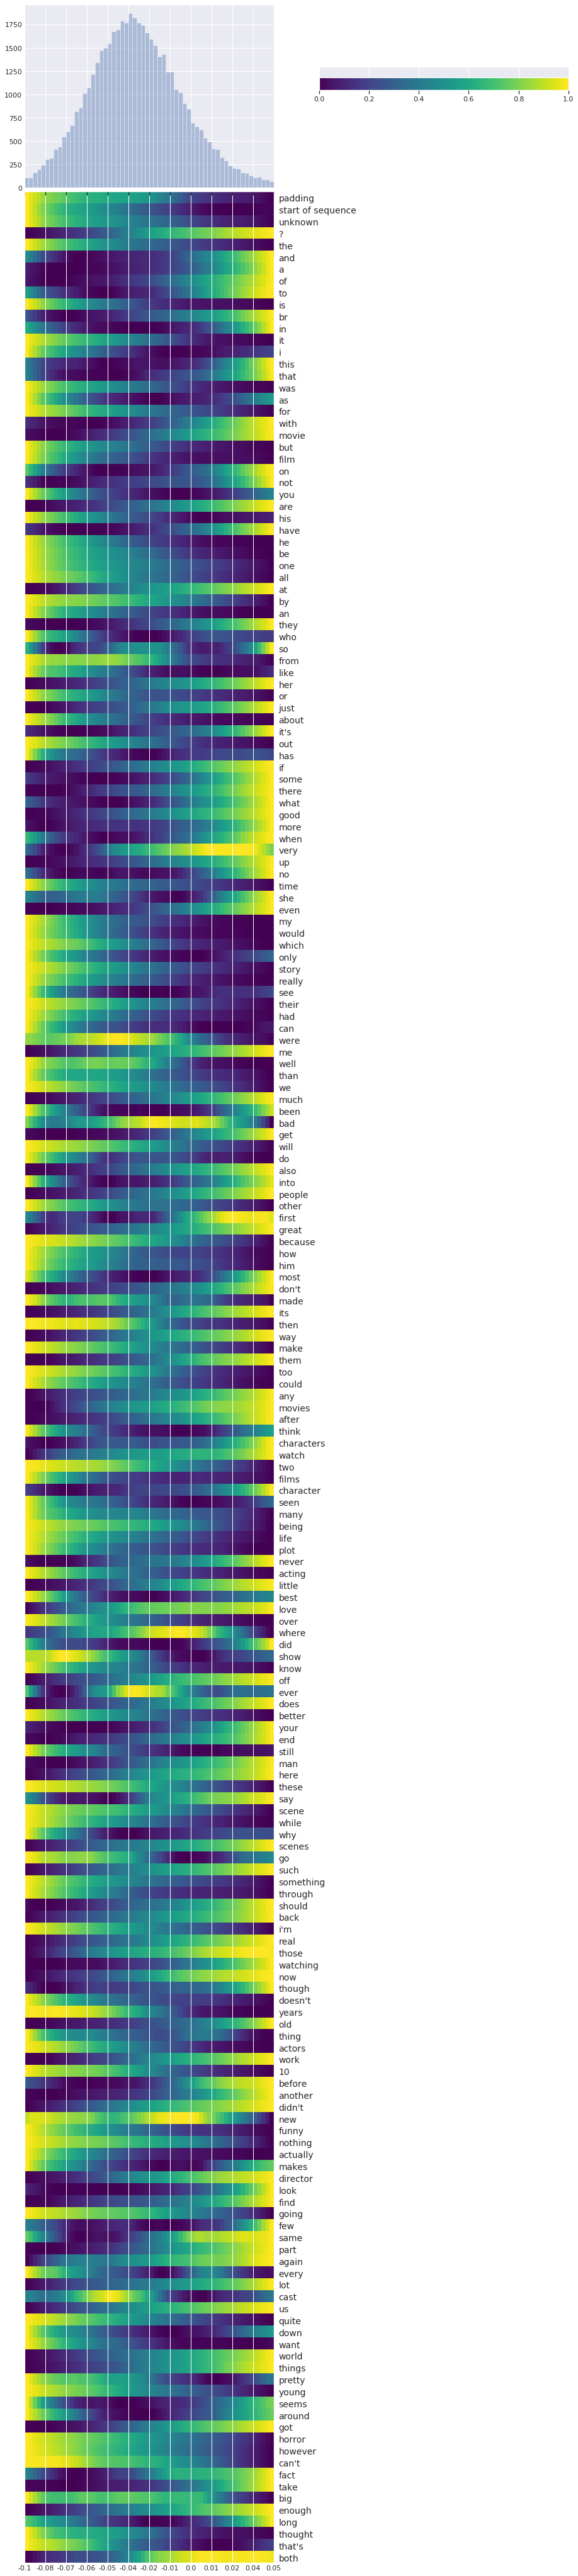

25000/25000 [==============================] - 12s 480us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 82/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 83/200
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 84/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 85/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 86/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 87/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0092
Epoch 88/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 89/200
25000/25000 [==============================] - 4s 152us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 90/200
25000/250

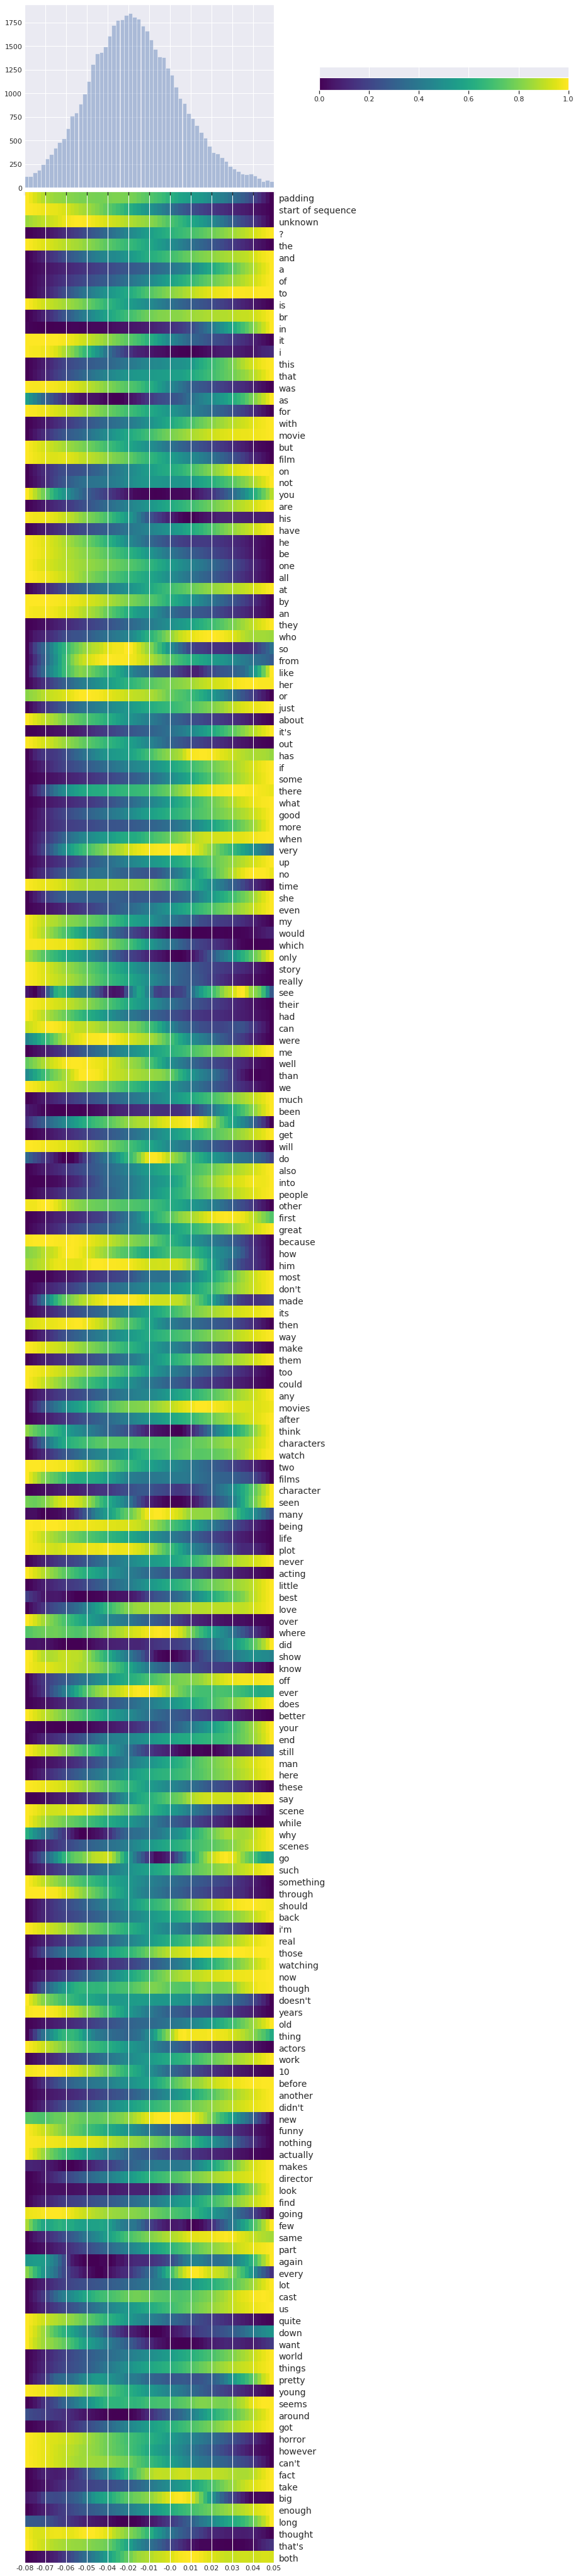

25000/25000 [==============================] - 12s 496us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 92/200
25000/25000 [==============================] - 4s 153us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 93/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 94/200
25000/25000 [==============================] - 4s 152us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 95/200
25000/25000 [==============================] - 4s 152us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 96/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 97/200
25000/25000 [==============================] - 4s 152us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 98/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 99/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 100/200
25000/25

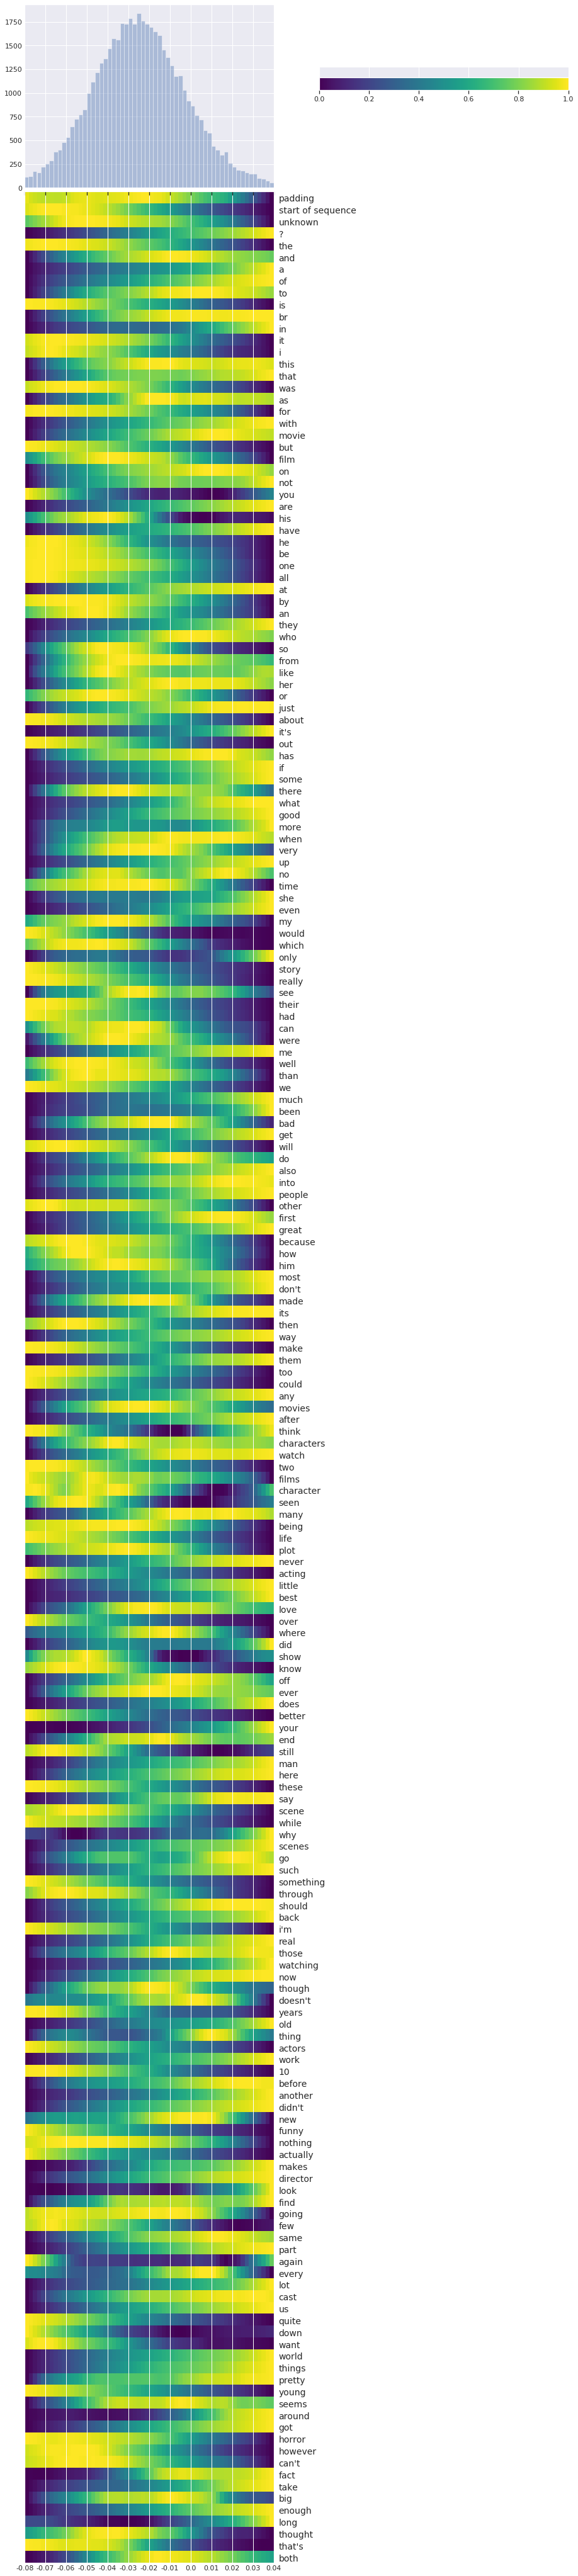

25000/25000 [==============================] - 12s 480us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 102/200
25000/25000 [==============================] - 4s 152us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 103/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 104/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 105/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 106/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 107/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 108/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 109/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 110/200


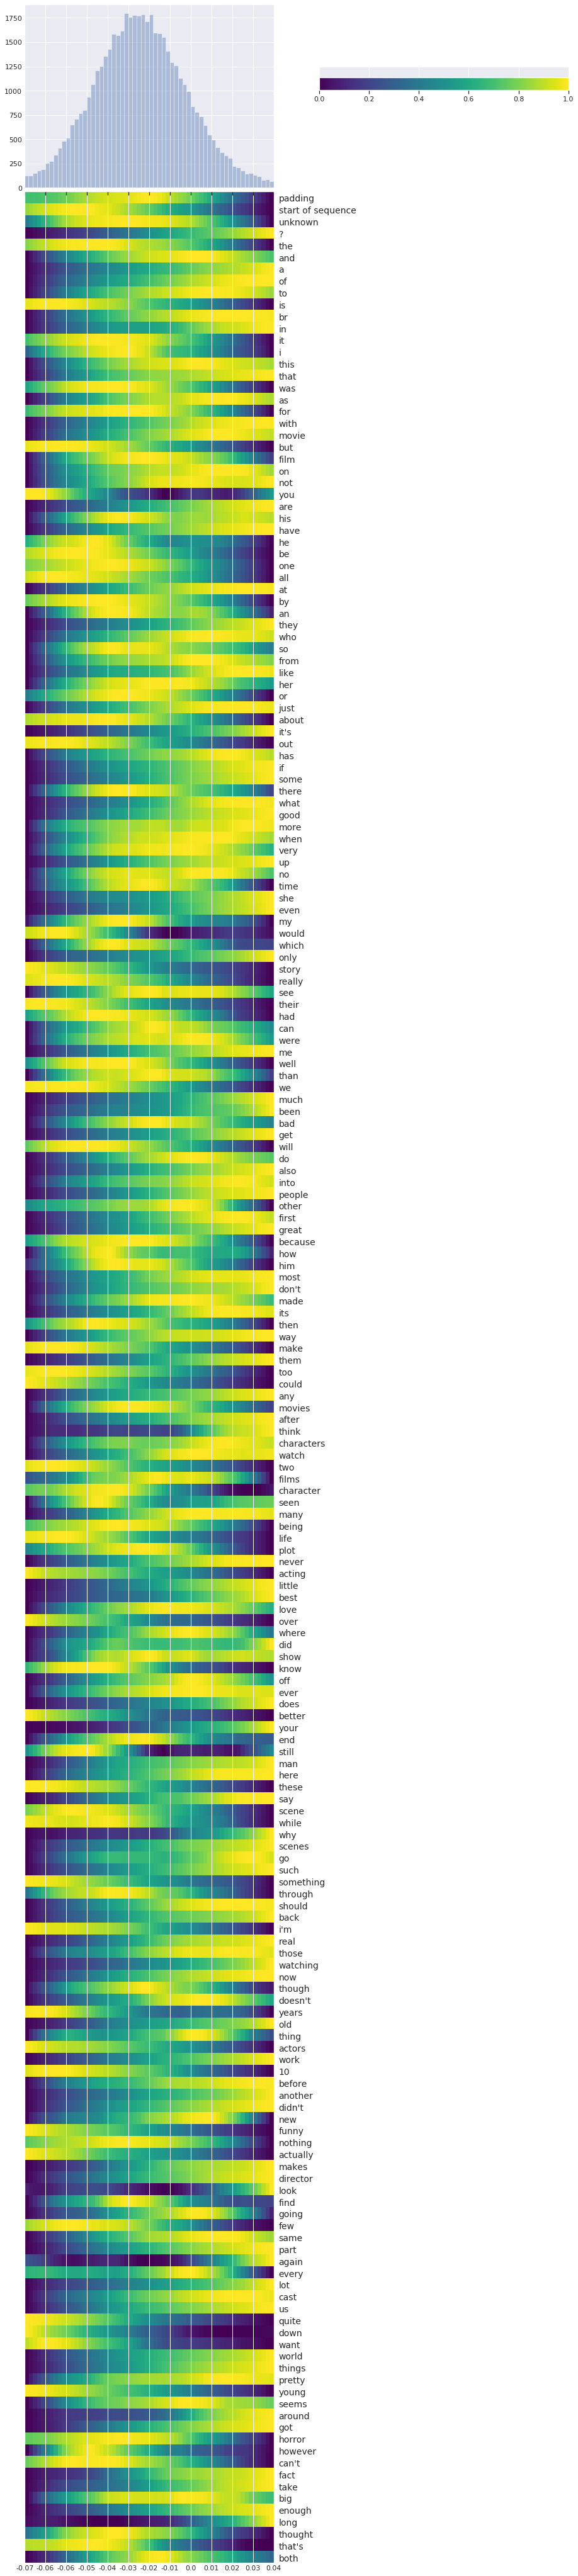

25000/25000 [==============================] - 12s 477us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 112/200
25000/25000 [==============================] - 4s 152us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 113/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 114/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 115/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 116/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 117/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 118/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 119/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 120/200


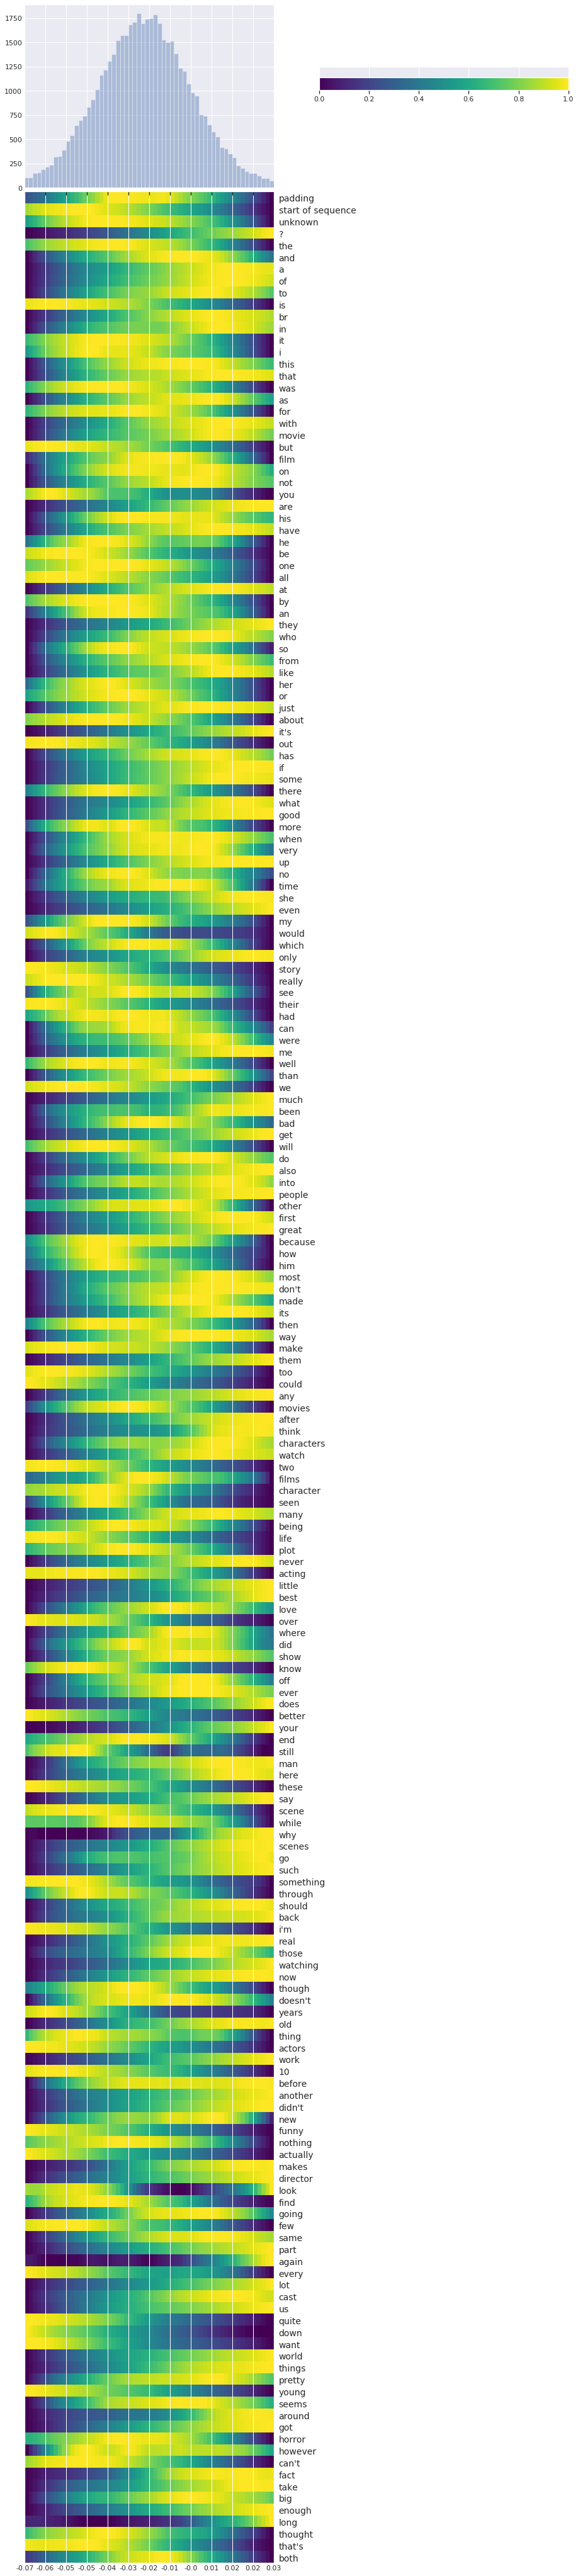

25000/25000 [==============================] - 12s 477us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 122/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 123/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 124/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 125/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 126/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 127/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 128/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 129/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 130/200


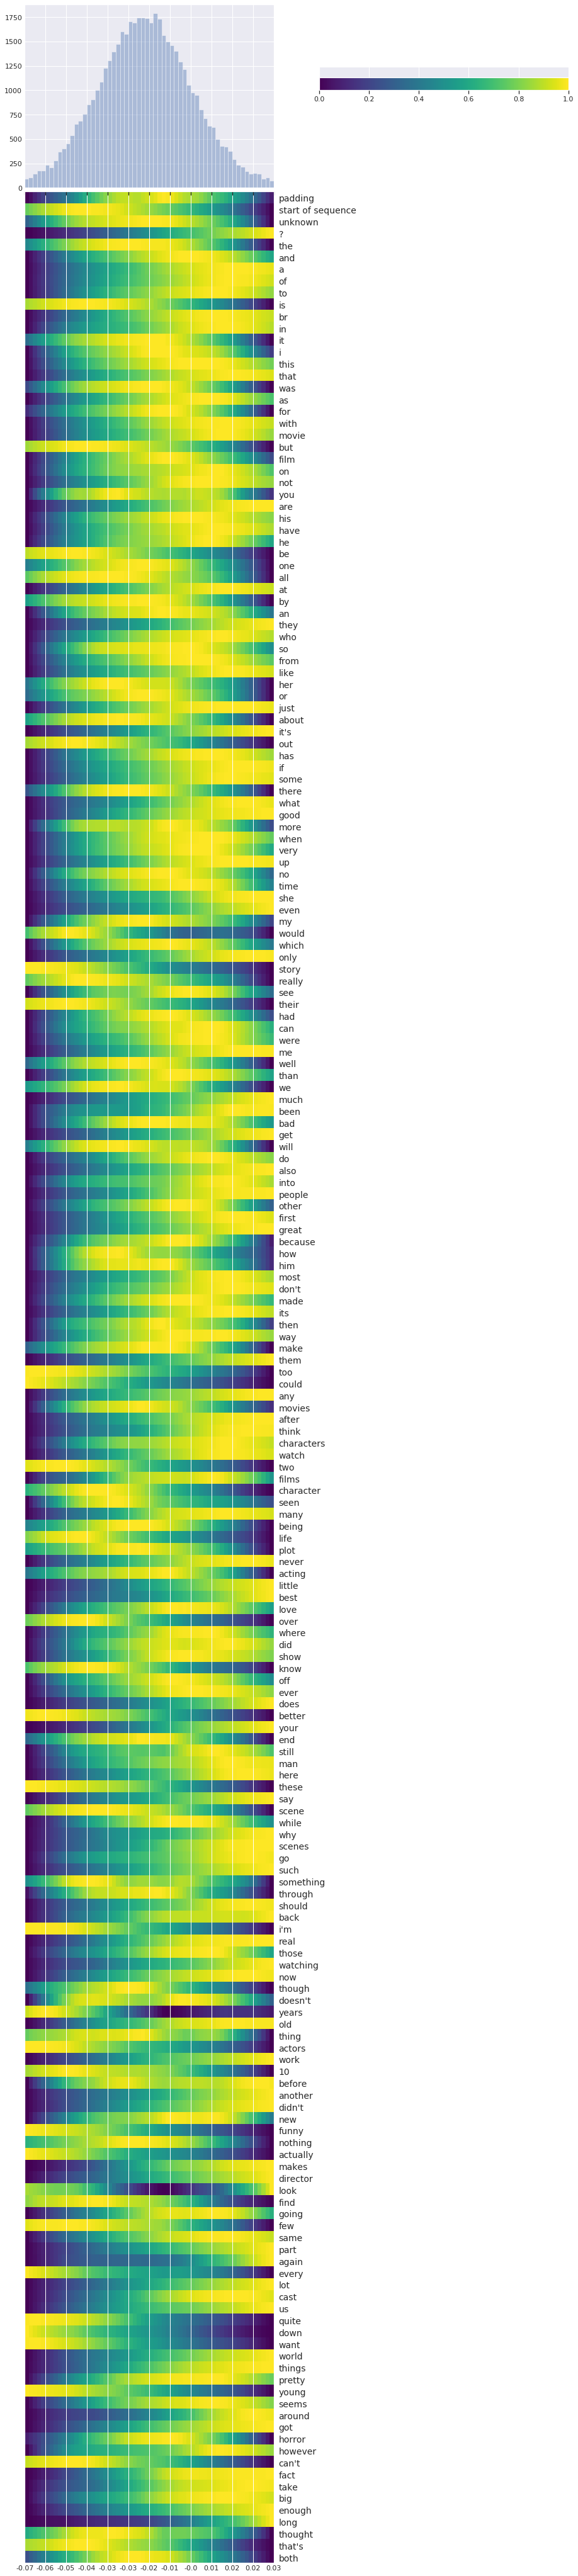

25000/25000 [==============================] - 12s 497us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 132/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 133/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 134/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 135/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 136/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 137/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 138/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 139/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 140/200


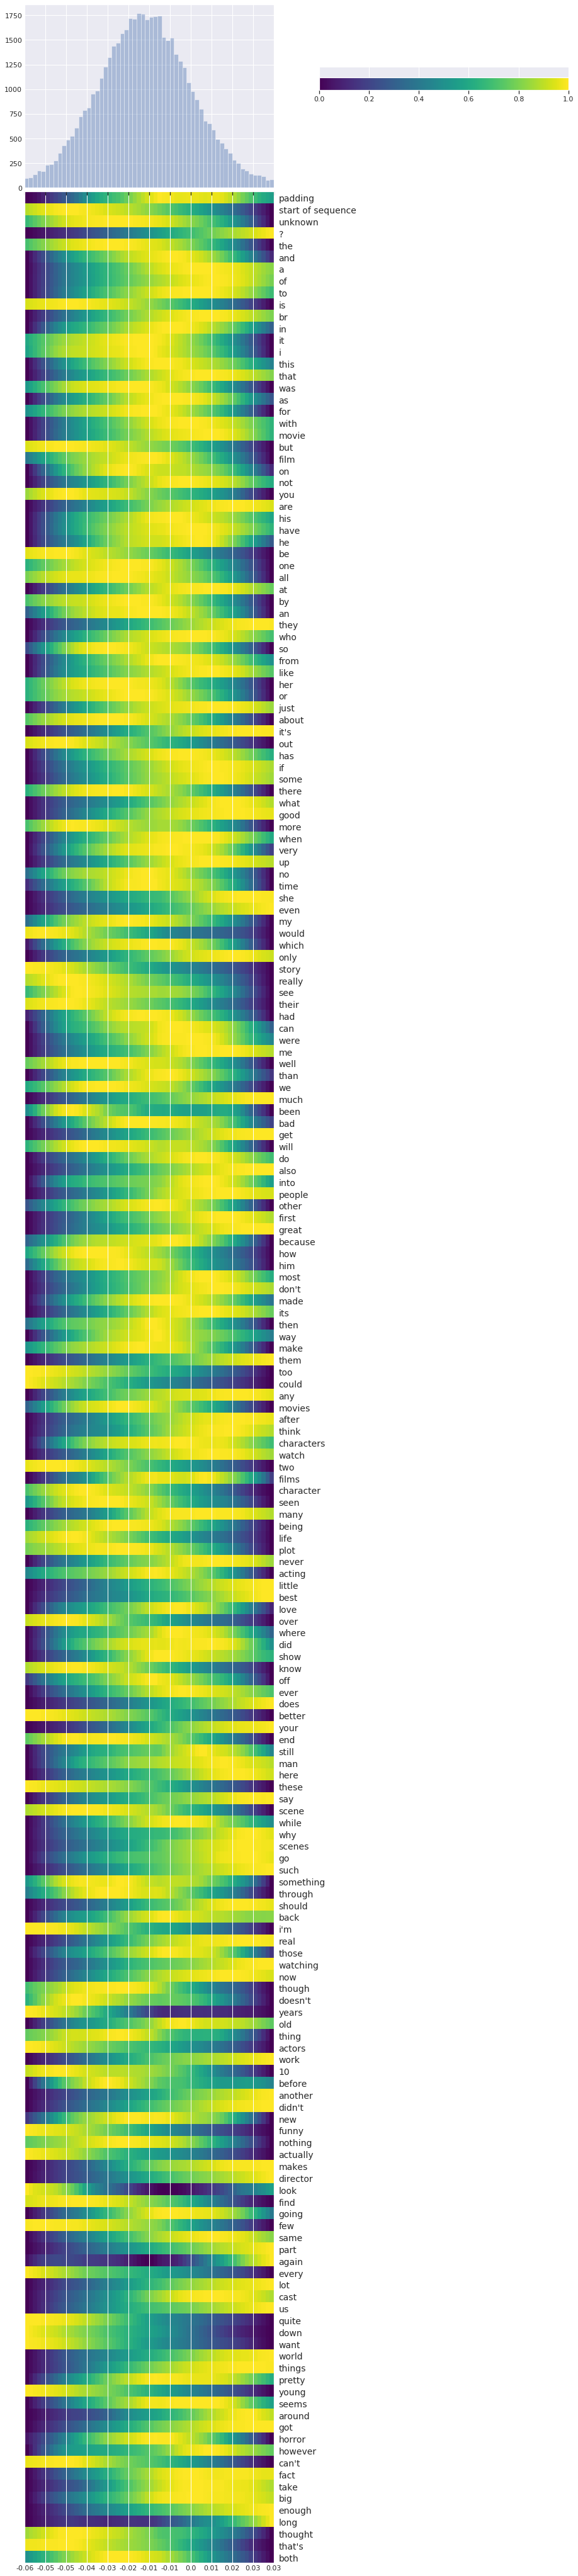

25000/25000 [==============================] - 12s 477us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 142/200
25000/25000 [==============================] - 4s 151us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 143/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 144/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 145/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 146/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 147/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 148/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 149/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 150/200


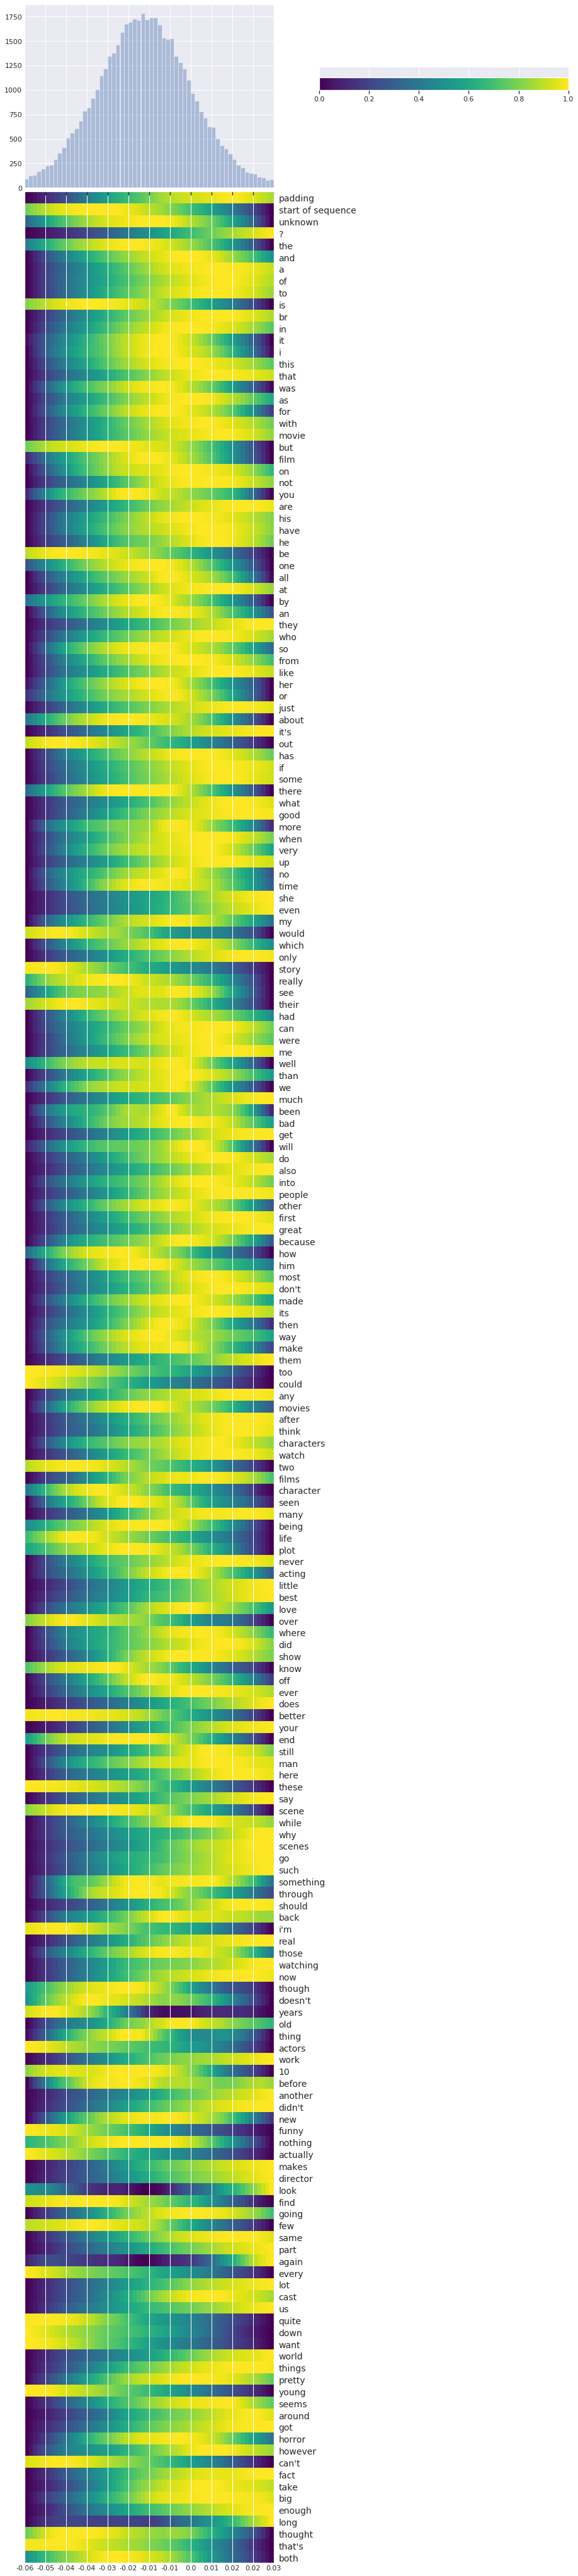

25000/25000 [==============================] - 12s 483us/sample - loss: 0.0097 - val_loss: 0.0091
Epoch 152/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 153/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 154/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 155/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 156/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 157/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 158/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 159/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 160/200


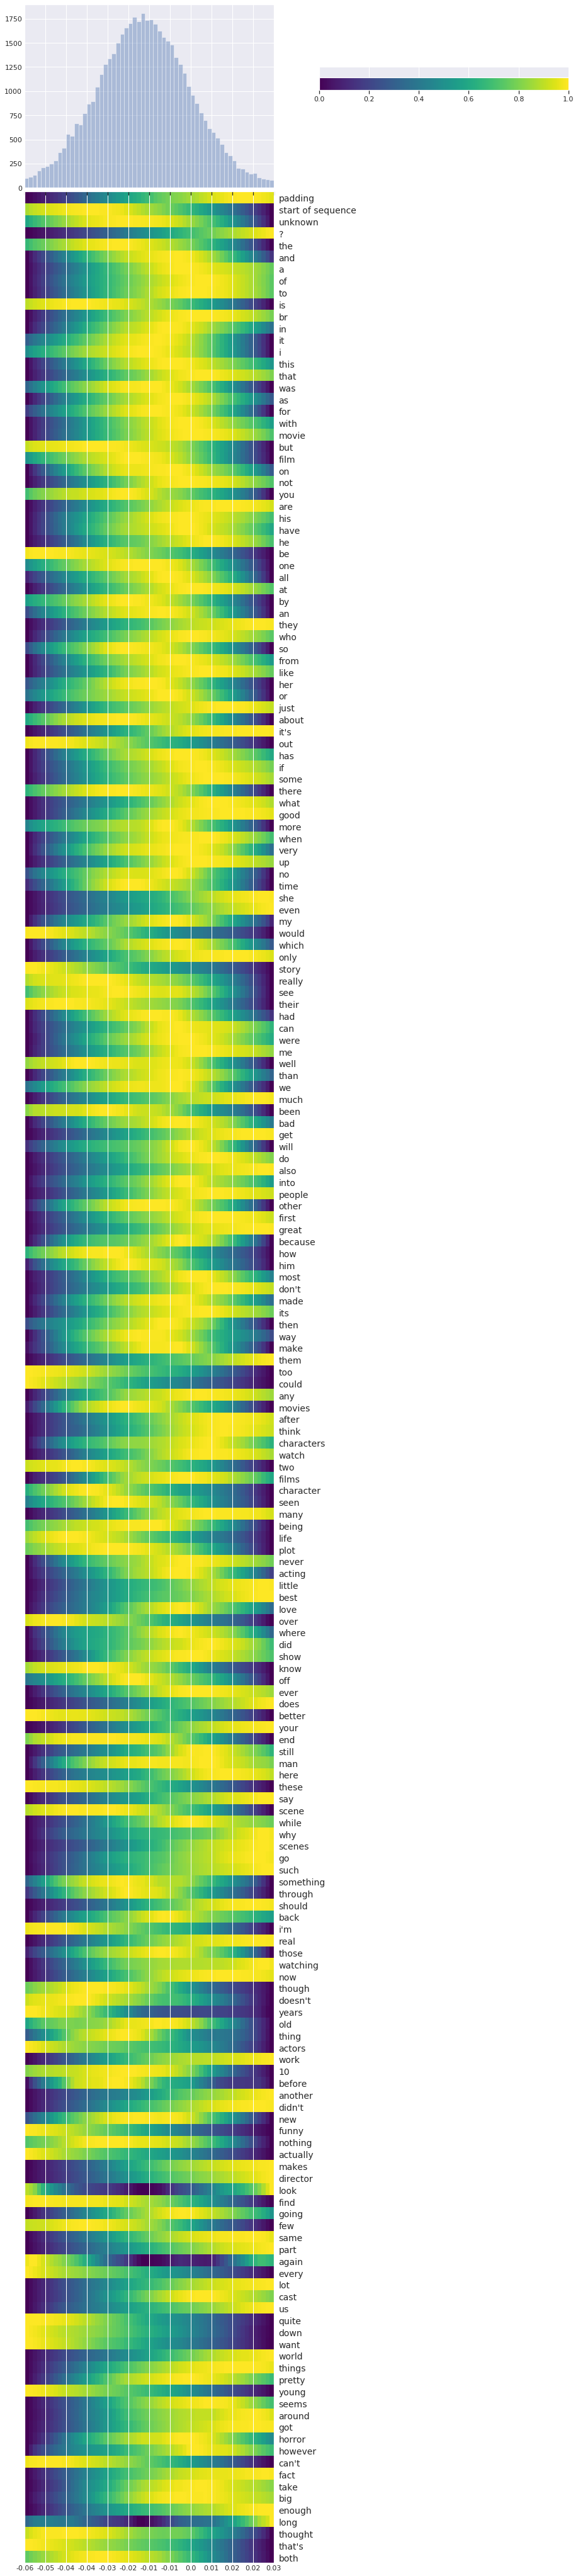

25000/25000 [==============================] - 12s 496us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 162/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 163/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 164/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 165/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 166/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 167/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 168/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 169/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 170/200


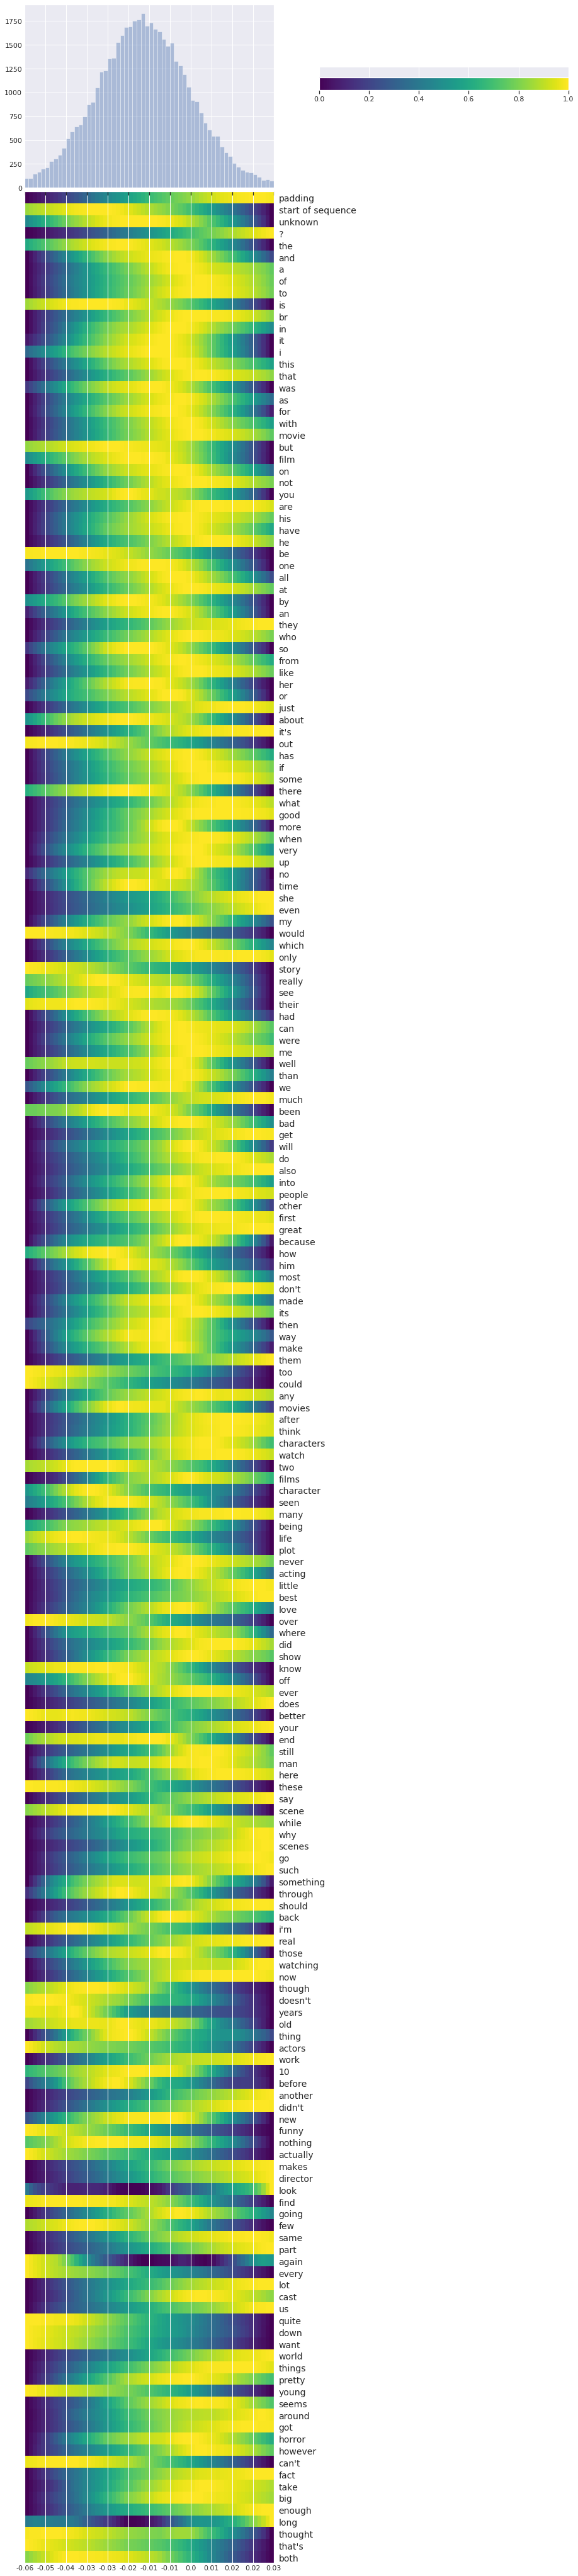

25000/25000 [==============================] - 12s 496us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 172/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 173/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 174/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 175/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 176/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 177/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 178/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 179/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 180/200


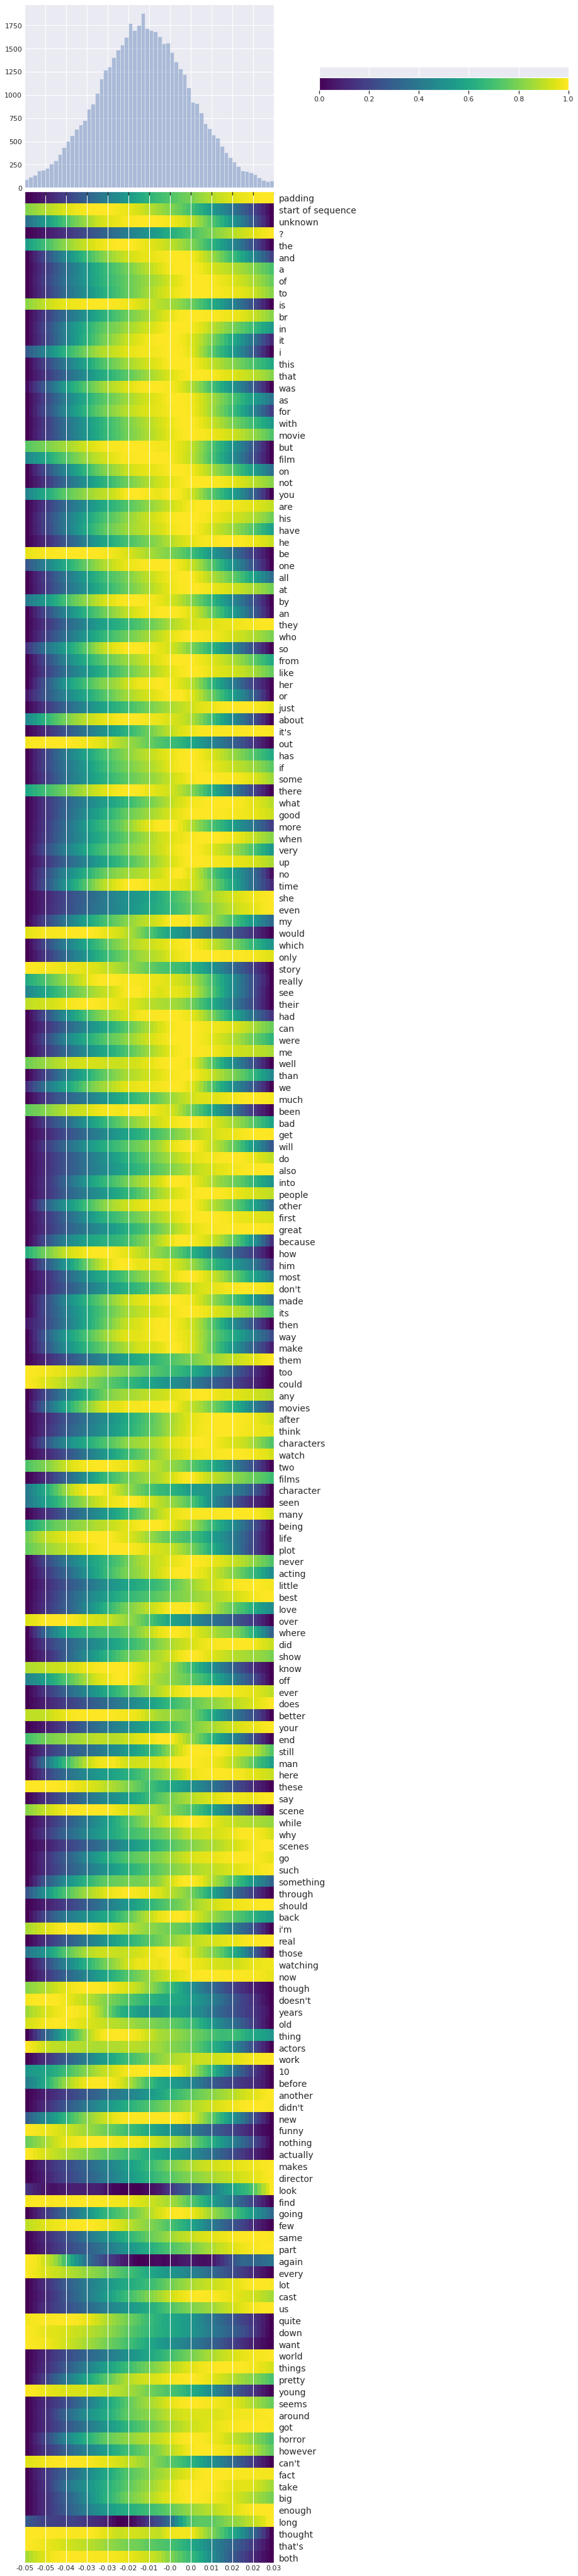

25000/25000 [==============================] - 12s 477us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 182/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 183/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 184/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 185/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 186/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 187/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 188/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 189/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 190/200


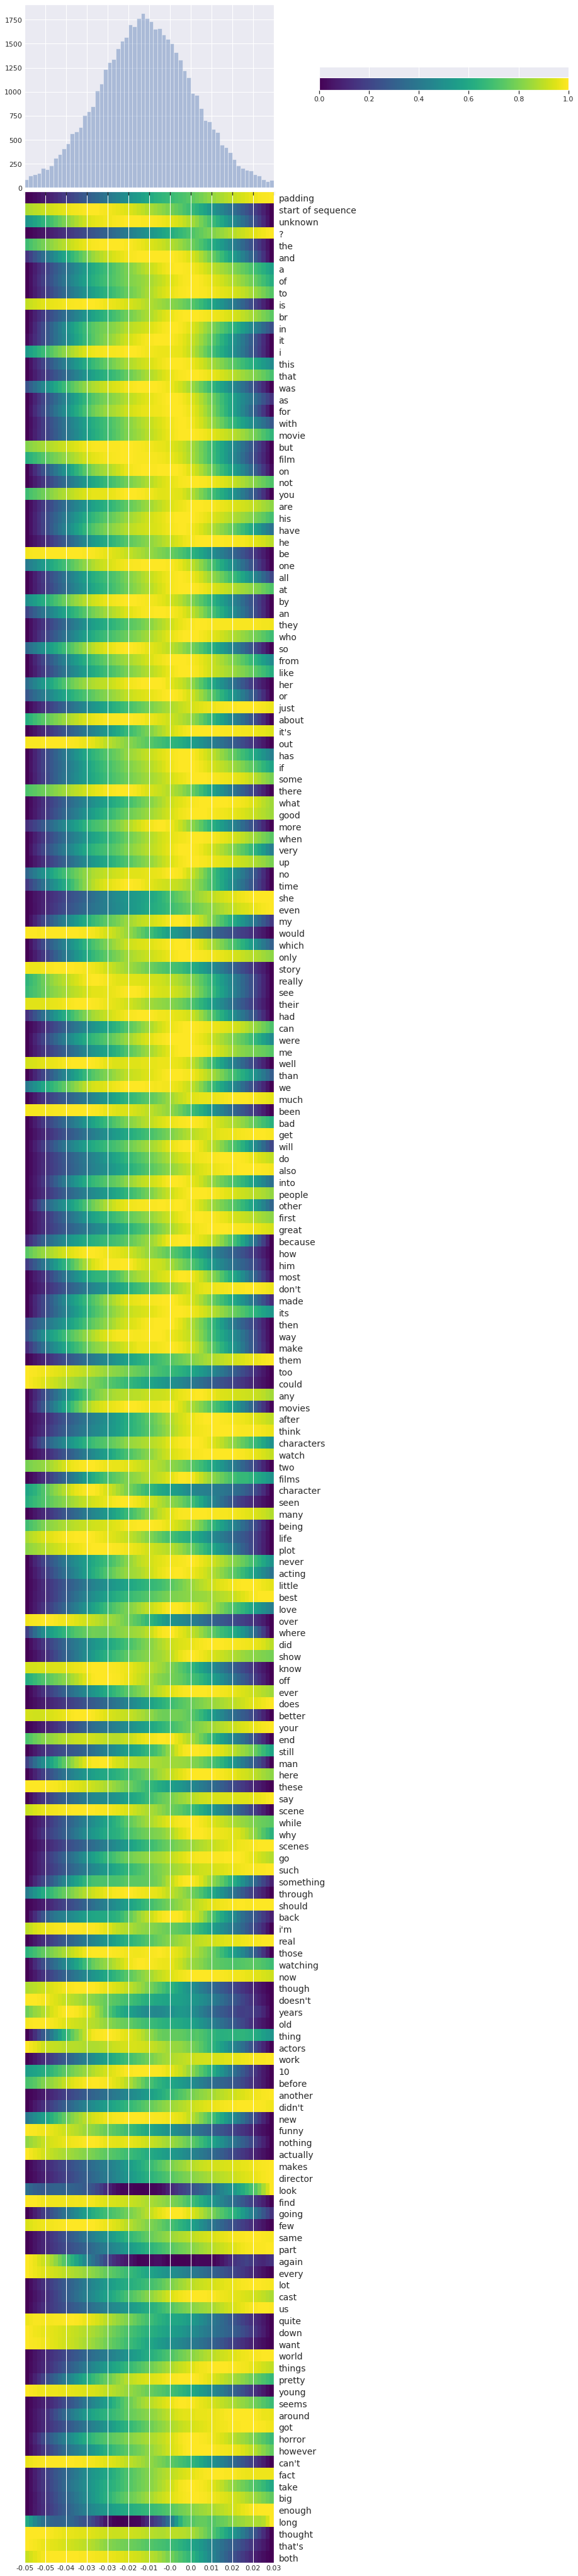

25000/25000 [==============================] - 12s 477us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 192/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 193/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 194/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 195/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 196/200
25000/25000 [==============================] - 4s 150us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 197/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 198/200
25000/25000 [==============================] - 4s 148us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 199/200
25000/25000 [==============================] - 4s 149us/sample - loss: 0.0096 - val_loss: 0.0091
Epoch 200/200


In [16]:
fitted = vae.fit(
    x=x_train, 
    y=None,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, None),
    callbacks = vae.callback_list
    )

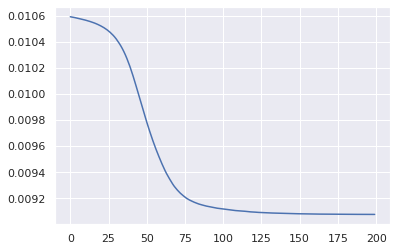

In [17]:
import matplotlib.pyplot as plt

plt.plot(fitted.history['val_loss'])

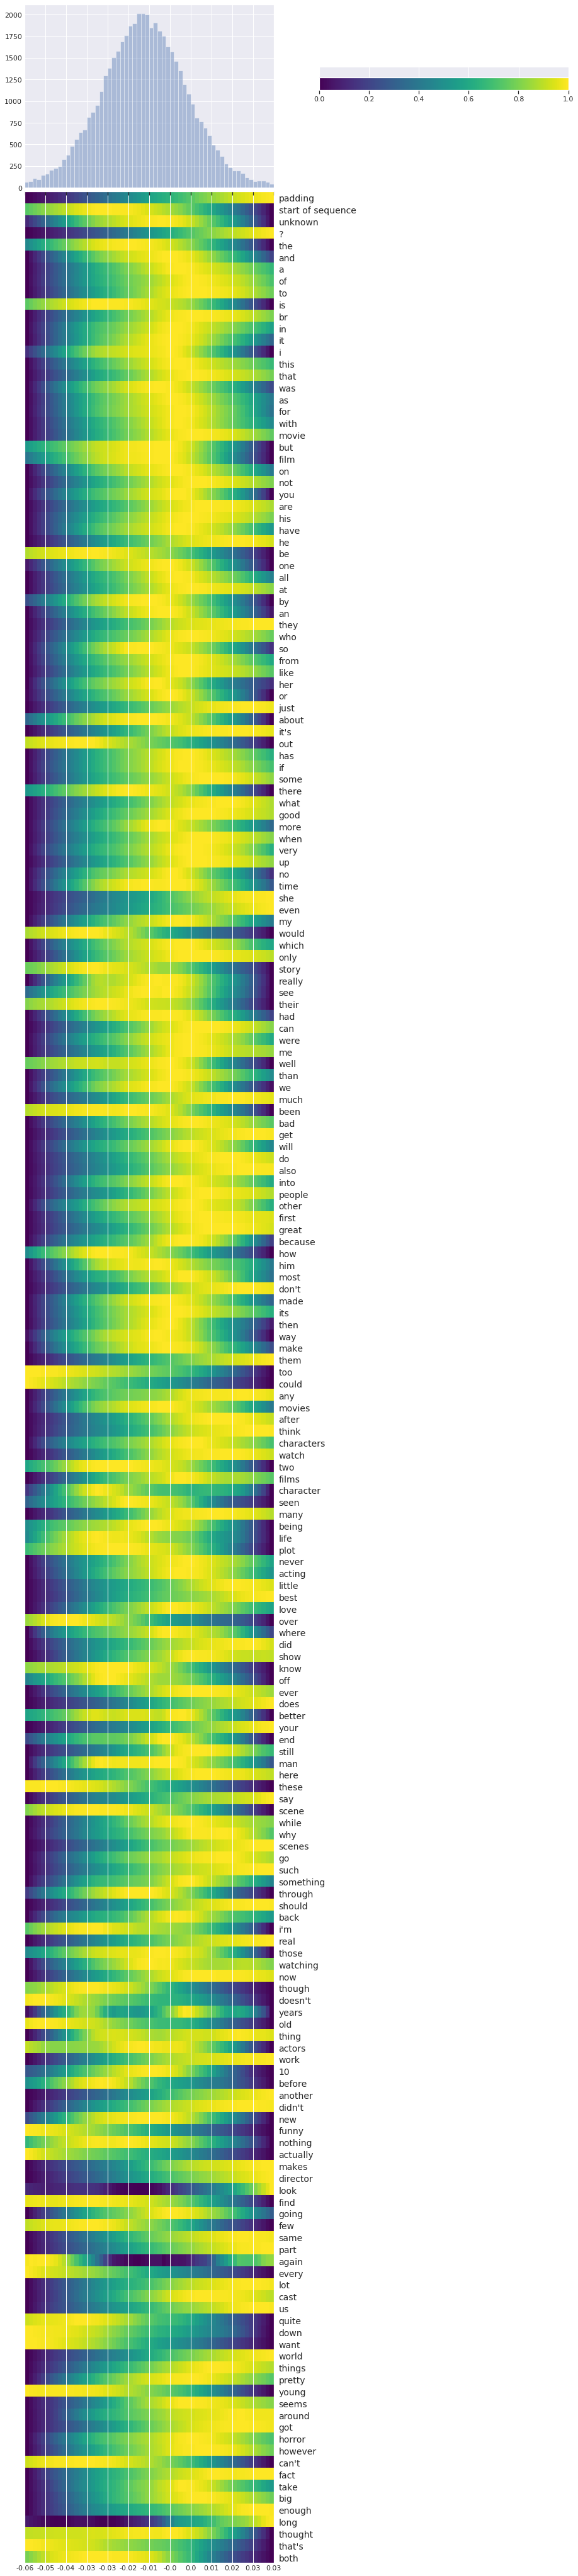

In [18]:

vnn.plot_types(encoder=vae.encoder,decoder=vae.decoder,data=qt,
           n_activity=  200,  
           lowest_percentile=0.5, 
           highest_percentile=99.5, 
           figsize =(10, 81), 
           hist_size=0.05, spacing= -0.001);

In [19]:
flag_1 = np.ones((qt.shape[0],1),dtype=qt.values.dtype)
data = np.concatenate((qt.values,flag_1),axis=-1)
encoded_data=pd.DataFrame(vae.encoder.predict(data))
encoded_data

0
0     -0.011926
1     -0.021245
2     -0.028106
3      0.012372
4      0.003522
...         ...
49995  0.002701
49996 -0.010207
49997 -0.019763
49998 -0.007191
49999  0.001032

[50000 rows x 1 columns]

In [20]:
reviews = pd.DataFrame(np.concatenate([y_train,y_test],axis=0))
reviews

0
0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
...    ...
49995  1.0
49996  1.0
49997  0.0
49998  0.0
49999  0.0

[50000 rows x 1 columns]

In [21]:
joint = pd.DataFrame( np.concatenate([encoded_data.values, 
                                      reviews.values],axis=1))
joint.columns = ['Encoded','Good']
joint

Encoded  Good
0     -0.011926   1.0
1     -0.021245   0.0
2     -0.028106   0.0
3      0.012372   1.0
4      0.003522   0.0
...         ...   ...
49995  0.002701   1.0
49996 -0.010207   1.0
49997 -0.019763   0.0
49998 -0.007191   0.0
49999  0.001032   0.0

[50000 rows x 2 columns]

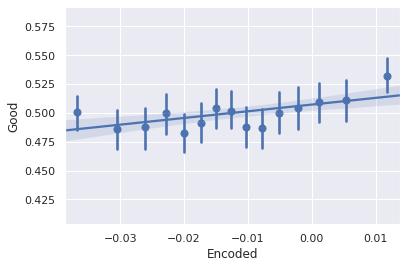

In [22]:
 import seaborn as sns
 
 ax= sns.regplot(x='Encoded', y='Good', data=joint, 
                 x_bins=15)
 
 ax.set_xlim(np.percentile(encoded_data, 5),
             np.percentile(encoded_data, 95));
 
 
             